In [12]:
pip install linearmodels

In [13]:
pip install pingouin

In [14]:
pip install tensorflow

In [15]:
from google.colab import drive
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import geopandas as gpd
from mpl_toolkits.axes_grid1 import make_axes_locatable
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
import pingouin as pg
from scipy import stats
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from pingouin import partial_corr
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.anova as anova
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from linearmodels.panel import PanelOLS
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices
from sklearn.model_selection import train_test_split
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso, LassoCV
from sklearn.linear_model import ElasticNet, ElasticNetCV
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV
import xgboost as xgb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam



 # Import necessary module

# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 1. Importing "Complete_Agri_Climate.csv" and Data Preprocessing

In [17]:
# Specify the file path
file_path = '/content/drive/My Drive/GoodNotes/Merged File for Analysis/Complete_Agri_Climate.csv'

agri_climate_df = pd.read_csv(file_path)

agri_climate_df

Year          State Commodity  ACRES HARVESTED  \
0     1981        alabama     WHEAT         565000.0   
1     1981        alabama  POTATOES          13100.0   
2     1981        alabama      CORN         530000.0   
3     1981        alabama    COTTON         372000.0   
4     1981        arizona     WHEAT         258000.0   
...    ...            ...       ...              ...   
6434  2022           iowa      CORN       12350000.0   
6435  2022      louisiana      CORN         435000.0   
6436  2022      louisiana      RICE         412000.0   
6437  2022      louisiana    COTTON         190000.0   
6438  2022  west virginia      CORN          30000.0   

      PRODUCTION, MEASURED IN $   YIELD  \
0                  2.486000e+07    44.0   
1                  2.285900e+07   159.0   
2                  7.870500e+07    55.0   
3                  1.132310e+08   545.0   
4                  2.184400e+07    84.7   
...                         ...     ...   
6434               1.635140e+10   200.0   
6435               4.925070e+08   170.0   
6436               4.667010e+08  6660.0   
6437               1.589520e+08   904.0   
6438               3.477600e+07   168.0   

      January-December Average Temperature (Units Degrees Fahrenheit)  \
0                                                  62.0                 
1                                                  62.0                 
2                                                  62.0                 
3                                                  62.0                 
4                                                  61.3                 
...                                                 ...                 
6434                                               47.5                 
6435                                               67.3                 
6436                                               67.3                 
6437                                               67.3                 
6438                                               52.4                 

      January-December Cooling Degree Days (Units Fahrenheit Degree-Days)  \
0                                                1793.0                     
1                                                1793.0                     
2                                                1793.0                     
3                                                1793.0                     
4                                                2987.0                     
...                                                 ...                     
6434                                              902.0                     
6435                                             2790.0                     
6436                                             2790.0                     
6437                                             2790.0                     
6438                                              815.0                     

      January-December Heating Degree Days (Units Fahrenheit Degree-Days)  \
0                                                3126.0                     
1                                                3126.0                     
2                                                3126.0                     
3                                                3126.0                     
4                                                1782.0                     
...                                                 ...                     
6434                                             7209.0                     
6435                                             1686.0                     
6436                                             1686.0                     
6437                                             1686.0                     
6438                                             5190.0                     

      January-December Maximum Temperature (Units Degrees Fahrenheit)  ...  \
0          

## 1.1 Checking Missing Value

In [18]:
agri_climate_df.isnull().sum()

Year                                                                      0
State                                                                     0
Commodity                                                                 0
ACRES HARVESTED                                                          14
PRODUCTION, MEASURED IN $                                                50
YIELD                                                                    14
January-December Average Temperature (Units Degrees Fahrenheit)           0
January-December Cooling Degree Days (Units Fahrenheit Degree-Days)      16
January-December Heating Degree Days (Units Fahrenheit Degree-Days)     183
January-December Maximum Temperature (Units Degrees Fahrenheit)           0
January-December Minimum Temperature (Units Degrees Fahrenheit)           0
August Palmer Drought Severity Index (PDSI)                              16
August Palmer Hydrological Drought Index (PHDI)                          16
August Palmer Modified Drought Index (PMDI)                              16
January-December Palmer Z-Index                                          16
January-December Precipitation (Units Inches)                             0
Allsky_Sfc_Par_Tot                                                     3148
Allsky_Sfc_Sw_Diff                                                     3148
Allsky_Sfc_Sw_Dni                                                      3148
Allsky_Sfc_Sw_Dwn                                                       469
Allsky_Sfc_Uva                                                         3148
Allsky_Sfc_Uvb                                                         3148
Allsky_Sfc_Uv_Index                                                    6439
Allsky_Srf_Alb                                                          469
Cloud_Amt                                                               469
Clrsky_Sfc_Par_Tot                                                     3148
Clrsky_Sfc_Sw_Dwn                                                       469
Gwetprof                                                                  0
Gwetroot                                                                  0
Gwettop                                                                   0
Ps                                                                        0
Qv2M                                                                      0
Rh2M                                                                      0
T2Mdew                                                                    0
T2Mwet                                                                    0
Toa_Sw_Dwn                                                              469
Ts                                                                        0
Wd10M                                                                     0
Wd2M                                                                      0
Ws10M                                                                     0
Ws2M                                                                      0
dtype: int64

In [19]:
agri_climate_df.shape

(6439, 41)

In [20]:
# drop the columns which have too many missing value.
columns_to_drop = [
    'Allsky_Sfc_Par_Tot',
    'Allsky_Sfc_Sw_Diff',
    'Allsky_Sfc_Sw_Dni',
    'Allsky_Sfc_Uva',
    'Allsky_Sfc_Uvb',
    'Allsky_Sfc_Uv_Index',
    'Clrsky_Sfc_Par_Tot'
]

# Dropping the specified columns
agri_climate_df.drop(columns=columns_to_drop, inplace=True)

# Dropping rows with missing values
agri_climate_df.dropna(inplace=True)

# Display the updated DataFrame
agri_climate_df

Year          State Commodity  ACRES HARVESTED  \
445   1984        alabama     WHEAT         380000.0   
446   1984        alabama  POTATOES          12900.0   
447   1984        alabama      CORN         385000.0   
448   1984        alabama    COTTON         307000.0   
449   1984        arizona     WHEAT         142000.0   
...    ...            ...       ...              ...   
6434  2022           iowa      CORN       12350000.0   
6435  2022      louisiana      CORN         435000.0   
6436  2022      louisiana      RICE         412000.0   
6437  2022      louisiana    COTTON         190000.0   
6438  2022  west virginia      CORN          30000.0   

      PRODUCTION, MEASURED IN $   YIELD  \
445                1.482000e+07    39.0   
446                1.192000e+07   124.0   
447                7.132100e+07    65.0   
448                1.201540e+08   699.0   
449                1.278000e+07    90.0   
...                         ...     ...   
6434               1.635140e+10   200.0   
6435               4.925070e+08   170.0   
6436               4.667010e+08  6660.0   
6437               1.589520e+08   904.0   
6438               3.477600e+07   168.0   

      January-December Average Temperature (Units Degrees Fahrenheit)  \
445                                                62.8                 
446                                                62.8                 
447                                                62.8                 
448                                                62.8                 
449                                                59.4                 
...                                                 ...                 
6434                                               47.5                 
6435                                               67.3                 
6436                                               67.3                 
6437                                               67.3                 
6438                                               52.4                 

      January-December Cooling Degree Days (Units Fahrenheit Degree-Days)  \
445                                              1720.0                     
446                                              1720.0                     
447                                              1720.0                     
448                                              1720.0                     
449                                              2710.0                     
...                                                 ...                     
6434                                              902.0                     
6435                                             2790.0                     
6436                                             2790.0                     
6437                                             2790.0                     
6438                                              815.0                     

      January-December Heating Degree Days (Units Fahrenheit Degree-Days)  \
445                                              2750.0                     
446                                              2750.0                     
447                                              2750.0                     
448                                              2750.0                     
449                                              2192.0                     
...                                                 ...                     
6434                                             7209.0                     
6435                                             1686.0                     
6436                                             1686.0                     
6437                                             1686.0                     
6438                                             5190.0                     

      January-December Maximum Temperature (Units Degrees Fahrenheit)  ...  \
445        

In [21]:
agri_climate_df.shape

(5749, 34)

In [22]:
agri_climate_df.isnull().sum()

Year                                                                   0
State                                                                  0
Commodity                                                              0
ACRES HARVESTED                                                        0
PRODUCTION, MEASURED IN $                                              0
YIELD                                                                  0
January-December Average Temperature (Units Degrees Fahrenheit)        0
January-December Cooling Degree Days (Units Fahrenheit Degree-Days)    0
January-December Heating Degree Days (Units Fahrenheit Degree-Days)    0
January-December Maximum Temperature (Units Degrees Fahrenheit)        0
January-December Minimum Temperature (Units Degrees Fahrenheit)        0
August Palmer Drought Severity Index (PDSI)                            0
August Palmer Hydrological Drought Index (PHDI)                        0
August Palmer Modified Drought Index (PMDI)                            0
January-December Palmer Z-Index                                        0
January-December Precipitation (Units Inches)                          0
Allsky_Sfc_Sw_Dwn                                                      0
Allsky_Srf_Alb                                                         0
Cloud_Amt                                                              0
Clrsky_Sfc_Sw_Dwn                                                      0
Gwetprof                                                               0
Gwetroot                                                               0
Gwettop                                                                0
Ps                                                                     0
Qv2M                                                                   0
Rh2M                                                                   0
T2Mdew                                                                 0
T2Mwet                                                                 0
Toa_Sw_Dwn                                                             0
Ts                                                                     0
Wd10M                                                                  0
Wd2M                                                                   0
Ws10M                                                                  0
Ws2M                                                                   0
dtype: int64

## 1.2 Detect Outliers

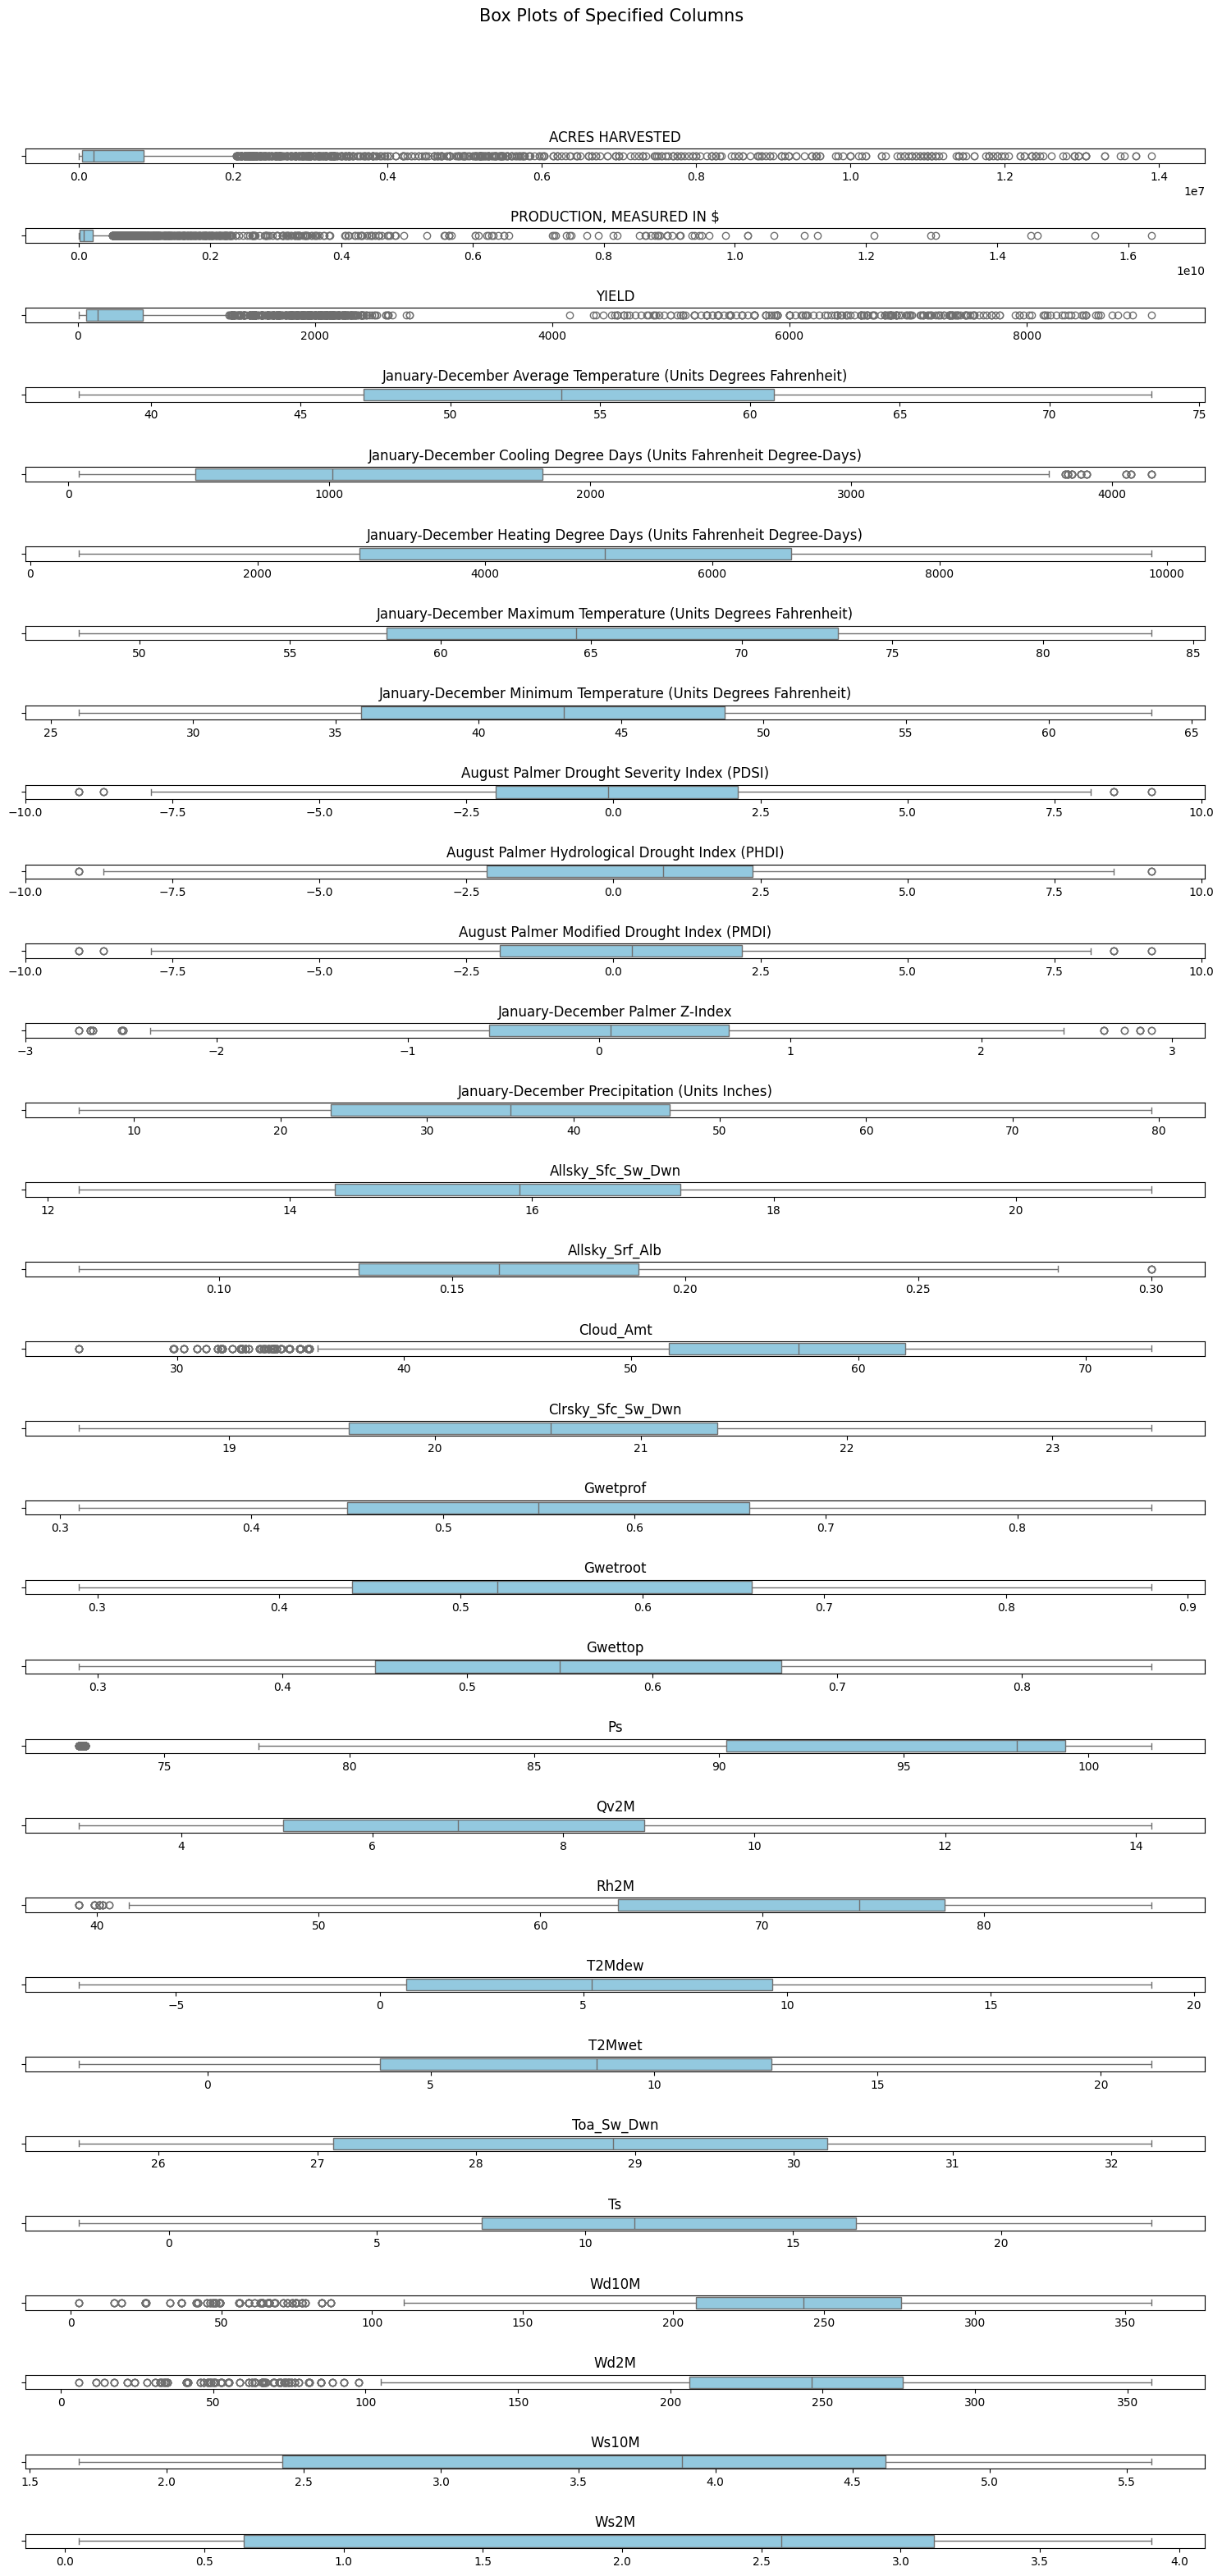

In [ ]:
# Columns to be checked for outliers
columns_to_check = ['ACRES HARVESTED',
                    'PRODUCTION, MEASURED IN $',
                    'YIELD',
                    'January-December Average Temperature (Units Degrees Fahrenheit)',
                    'January-December Cooling Degree Days (Units Fahrenheit Degree-Days)',
                    'January-December Heating Degree Days (Units Fahrenheit Degree-Days)',
                    'January-December Maximum Temperature (Units Degrees Fahrenheit)',
                    'January-December Minimum Temperature (Units Degrees Fahrenheit)',
                    'August Palmer Drought Severity Index (PDSI)',
                    'August Palmer Hydrological Drought Index (PHDI)',
                    'August Palmer Modified Drought Index (PMDI)',
                    'January-December Palmer Z-Index',
                    'January-December Precipitation (Units Inches)',
                    'Allsky_Sfc_Sw_Dwn',
                    'Allsky_Srf_Alb',
                    'Cloud_Amt',
                    'Clrsky_Sfc_Sw_Dwn',
                    'Gwetprof',
                    'Gwetroot',
                    'Gwettop',
                    'Ps',
                    'Qv2M',
                    'Rh2M',
                    'T2Mdew',
                    'T2Mwet',
                    'Toa_Sw_Dwn',
                    'Ts',
                    'Wd10M',
                    'Wd2M',
                    'Ws10M',
                    'Ws2M'
]

# Set up the matplotlib figure
plt.figure(figsize=(15, 33))
plt.suptitle('Box Plots of Specified Columns', fontsize=15)

# Create a box plot for each column
for i, column in enumerate(columns_to_check, 1):
    plt.subplot(len(columns_to_check), 1, i)  # One column layout
    sns.boxplot(x=agri_climate_df[column], color='skyblue')
    plt.title(column, fontsize=12)
    plt.xlabel('')  # Remove the x-axis label to reduce clutter

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to fit titles
plt.show()


## 1.3 Feature Scaling - Features of big magnitudes can wrongly outweigh features of small magnitudes
- We use **Robust Scaler** here, because some features have outliers.


In [ ]:
columns_to_scale = [
    'ACRES HARVESTED',
    'PRODUCTION, MEASURED IN $',
    'YIELD',
    'January-December Average Temperature (Units Degrees Fahrenheit)',
    'January-December Cooling Degree Days (Units Fahrenheit Degree-Days)',
    'January-December Heating Degree Days (Units Fahrenheit Degree-Days)',
    'January-December Maximum Temperature (Units Degrees Fahrenheit)',
    'January-December Minimum Temperature (Units Degrees Fahrenheit)',
    'August Palmer Drought Severity Index (PDSI)',
    'August Palmer Hydrological Drought Index (PHDI)',
    'August Palmer Modified Drought Index (PMDI)',
    'January-December Palmer Z-Index',
    'January-December Precipitation (Units Inches)',
    'Allsky_Sfc_Sw_Dwn',
    'Allsky_Srf_Alb',
    'Cloud_Amt',
    'Clrsky_Sfc_Sw_Dwn',
    'Gwetprof',
    'Gwetroot',
    'Gwettop',
    'Ps',
    'Qv2M',
    'Rh2M',
    'T2Mdew',
    'T2Mwet',
    'Toa_Sw_Dwn',
    'Ts',
    'Wd10M',
    'Wd2M',
    'Ws10M',
    'Ws2M'
]

# Initialize the RobustScaler
scaler = RobustScaler()

# Applying the RobustScaler to the specified columns
agri_climate_df[columns_to_scale] = scaler.fit_transform(agri_climate_df[columns_to_scale])

# Display the updated DataFrame
agri_climate_df

Year      State Commodity  ACRES HARVESTED  PRODUCTION, MEASURED IN $  \
364   1984    alabama     WHEAT         0.240903                  -0.270356   
365   1984    alabama  POTATOES        -0.219699                  -0.285142   
366   1984    alabama      CORN         0.247177                   0.017736   
367   1984    alabama    COTTON         0.149310                   0.266730   
368   1984    arizona     WHEAT        -0.057716                  -0.280757   
...    ...        ...       ...              ...                        ...   
5260  2021  louisiana    COTTON        -0.105395                   0.126827   
5261  2022       iowa      CORN        15.259724                  83.028012   
5262  2022  louisiana      CORN         0.309912                   2.165316   
5263  2022  louisiana      RICE         0.281054                   2.033734   
5264  2022  louisiana    COTTON         0.002509                   0.464557   

          YIELD  \
364   -0.280000   
365   -0.101053   
366   -0.225263   
367    1.109474   
368   -0.172632   
...         ...   
5260   1.766316   
5261   0.058947   
5262  -0.004211   
5263  13.658947   
5264   1.541053   

      January-December Average Temperature (Units Degrees Fahrenheit)  \
364                                            0.664234                 
365                                            0.664234                 
366                                            0.664234                 
367                                            0.664234                 
368                                            0.416058                 
...                                                 ...                 
5260                                           1.007299                 
5261                                          -0.452555                 
5262                                           0.992701                 
5263                                           0.992701                 
5264                                           0.992701                 

      January-December Cooling Degree Days (Units Fahrenheit Degree-Days)  \
364                                            0.532480                     
365                                            0.532480                     
366                                            0.532480                     
367                                            0.532480                     
368                                            1.278102                     
...                                                 ...                     
5260                                           1.272830                     
5261                                          -0.083600                     
5262                                           1.338354                     
5263                                           1.338354                     
5264                                           1.338354                     

      January-December Heating Degree Days (Units Fahrenheit Degree-Days)  \
364                                           -0.608215                     
365                                           -0.608215                     
366                                           -0.608215                     
367                                           -0.608215                     
368                                           -0.755134                     
...                                                 ...                     
5260                                          -0.934702                     
5261                                           0.565824                     
5262                                          -0.888362                     
5263                                          -0.888362                     
5264                                          -0.888362                     

      January-December Maximum Temperature (Units Degrees Fahrenheit)  ...  \
364                    

## 1.4 Encoding Commodity Column to generate another dataframe: agri_climate_df_encode for later use.
- The impact of other variables (like climate features) on the target can vary depending on the commodity type. Encoding allows the model to learn these interaction effects.

In [ ]:
# One-hot encode the 'Commodity' column
agri_climate_df_encode = pd.get_dummies(agri_climate_df, columns=['Commodity'], drop_first=False)

# Convert boolean columns to integers (0 and 1)
for column in agri_climate_df_encode.columns:
    if agri_climate_df_encode[column].dtype == 'bool':
        agri_climate_df_encode[column] = agri_climate_df_encode[column].astype(int)

# Display the updated DataFrame
agri_climate_df_encode

Year      State  ACRES HARVESTED  PRODUCTION, MEASURED IN $      YIELD  \
364   1984    alabama         0.240903                  -0.270356  -0.280000   
365   1984    alabama        -0.219699                  -0.285142  -0.101053   
366   1984    alabama         0.247177                   0.017736  -0.225263   
367   1984    alabama         0.149310                   0.266730   1.109474   
368   1984    arizona        -0.057716                  -0.280757  -0.172632   
...    ...        ...              ...                        ...        ...   
5260  2021  louisiana        -0.105395                   0.126827   1.766316   
5261  2022       iowa        15.259724                  83.028012   0.058947   
5262  2022  louisiana         0.309912                   2.165316  -0.004211   
5263  2022  louisiana         0.281054                   2.033734  13.658947   
5264  2022  louisiana         0.002509                   0.464557   1.541053   

      January-December Average Temperature (Units Degrees Fahrenheit)  \
364                                            0.664234                 
365                                            0.664234                 
366                                            0.664234                 
367                                            0.664234                 
368                                            0.416058                 
...                                                 ...                 
5260                                           1.007299                 
5261                                          -0.452555                 
5262                                           0.992701                 
5263                                           0.992701                 
5264                                           0.992701                 

      January-December Cooling Degree Days (Units Fahrenheit Degree-Days)  \
364                                            0.532480                     
365                                            0.532480                     
366                                            0.532480                     
367                                            0.532480                     
368                                            1.278102                     
...                                                 ...                     
5260                                           1.272830                     
5261                                          -0.083600                     
5262                                           1.338354                     
5263                                           1.338354                     
5264                                           1.338354                     

      January-December Heating Degree Days (Units Fahrenheit Degree-Days)  \
364                                           -0.608215                     
365                                           -0.608215                     
366                                           -0.608215                     
367                                           -0.608215                     
368                                           -0.755134                     
...                                                 ...                     
5260                                          -0.934702                     
5261                                           0.565824                     
5262                                          -0.888362                     
5263                                          -0.888362                     
5264                                          -0.888362                     

      January-December Maximum Temperature (Units Degrees Fahrenheit)  \
364                                            0.693333                 
365                                            0.693333                 
366                                            0.693333                 
367                       

# 2. Correlation Analysis

## 2.1 Pearson Correlation
- Pearson correlation coefficient is calculated between the specified agricultural metric (e.g., YIELD) and each climate variable independently.
- Pearson Correlation: Pearson correlation measures the linear relationship between two variables without considering the effect of other variables. It is a measure of the strength and direction of the linear relationship between two variables.

In [ ]:
# Select relevant columns for analysis
agriculture_columns = ['YIELD', 'ACRES HARVESTED', 'PRODUCTION, MEASURED IN $']

climate_columns_without_commodity = [
    'January-December Average Temperature (Units Degrees Fahrenheit)',
    'January-December Cooling Degree Days (Units Fahrenheit Degree-Days)',
    'January-December Heating Degree Days (Units Fahrenheit Degree-Days)',
    'January-December Maximum Temperature (Units Degrees Fahrenheit)',
    'January-December Minimum Temperature (Units Degrees Fahrenheit)',
    'August Palmer Drought Severity Index (PDSI)',
    'August Palmer Hydrological Drought Index (PHDI)',
    'August Palmer Modified Drought Index (PMDI)',
    'January-December Palmer Z-Index',
    'January-December Precipitation (Units Inches)',
    'Allsky_Sfc_Sw_Dwn',
    'Allsky_Srf_Alb',
    'Cloud_Amt',
    'Clrsky_Sfc_Sw_Dwn',
    'Gwetprof',
    'Gwetroot',
    'Gwettop',
    'Ps',
    'Qv2M',
    'Rh2M',
    'T2Mdew',
    'T2Mwet',
    'Toa_Sw_Dwn',
    'Ts',
    'Wd10M',
    'Wd2M',
    'Ws10M',
    'Ws2M'
]

climate_columns_with_commodity = [
     'January-December Average Temperature (Units Degrees Fahrenheit)',
     'January-December Cooling Degree Days (Units Fahrenheit Degree-Days)',
     'January-December Heating Degree Days (Units Fahrenheit Degree-Days)',
     'January-December Maximum Temperature (Units Degrees Fahrenheit)',
     'January-December Minimum Temperature (Units Degrees Fahrenheit)',
     'August Palmer Drought Severity Index (PDSI)',
     'August Palmer Hydrological Drought Index (PHDI)',
     'August Palmer Modified Drought Index (PMDI)',
     'January-December Palmer Z-Index',
     'January-December Precipitation (Units Inches)',
     'Allsky_Sfc_Sw_Dwn',
     'Allsky_Srf_Alb',
     'Cloud_Amt',
     'Clrsky_Sfc_Sw_Dwn',
     'Gwetprof',
     'Gwetroot',
     'Gwettop',
     'Ps',
     'Qv2M',
     'Rh2M',
     'T2Mdew',
     'T2Mwet',
     'Toa_Sw_Dwn',
     'Ts',
     'Wd10M',
     'Wd2M',
     'Ws10M',
     'Ws2M',
     'Commodity_BEANS',
     'Commodity_CORN',
     'Commodity_COTTON',
     'Commodity_POTATOES',
     'Commodity_RICE',
     'Commodity_TOMATOES',
     'Commodity_WHEAT'
     ]

### 2.1.1 Pearson correlation coefficients on agri_climate_df.

In [ ]:
# Function to compute Pearson correlation coefficients and plot results for a specific commodity
def pearson_correlation_agri_climate_df(commodity, agriculture_metric, title):
    # Filter dataframe for the specific commodity
    df_commodity = agri_climate_df[agri_climate_df['Commodity'] == commodity]

    # Check if there are enough data points to compute correlations
    if len(df_commodity) < 2:
        print(f"Not enough data points for {commodity}. Skipping correlation computation.")
        return

    correlation_results = {}
    for climate_var in climate_columns_without_commodity:
        correlation_coefficient, _ = pearsonr(df_commodity[agriculture_metric], df_commodity[climate_var])
        correlation_results[climate_var] = correlation_coefficient

    # Print correlation results
    print(f"Pearson Correlation Coefficients - {agriculture_metric} for {commodity}:")
    for climate_var, corr_coeff in correlation_results.items():
        print(f"{climate_var}: {corr_coeff}")

    # Plotting correlation coefficients with different colors for positive and negative values
    plt.figure(figsize=(10, 6))

    # Define colors based on correlation sign
    bar_colors = ['skyblue' if corr > 0 else 'lightcoral' for corr in correlation_results.values()]

    # Plot horizontal bar chart
    plt.barh(climate_columns_without_commodity, [correlation_results[var] for var in climate_columns_without_commodity], color=bar_colors)

    plt.xlabel('Pearson Correlation Coefficient')
    plt.title(f'Pearson Correlation between {agriculture_metric} and Climate Variables for {commodity}')
    plt.grid(True)
    plt.show()

Pearson Correlation Coefficients - YIELD for WHEAT:
January-December Average Temperature (Units Degrees Fahrenheit): -0.024154301052968386
January-December Cooling Degree Days (Units Fahrenheit Degree-Days): 0.05105301071916364
January-December Heating Degree Days (Units Fahrenheit Degree-Days): -0.1550402969806669
January-December Maximum Temperature (Units Degrees Fahrenheit): -0.025984994322074673
January-December Minimum Temperature (Units Degrees Fahrenheit): -0.02162064663130033
August Palmer Drought Severity Index (PDSI): -0.015908276872484684
August Palmer Hydrological Drought Index (PHDI): 0.0027459551861237596
August Palmer Modified Drought Index (PMDI): 0.007977403978061568
January-December Palmer Z-Index: -0.019617357952769213
January-December Precipitation (Units Inches): -0.10926466772090417
Allsky_Sfc_Sw_Dwn: 0.12121035452313746
Allsky_Srf_Alb: -0.07314601532878275
Cloud_Amt: -0.2737891499714454
Clrsky_Sfc_Sw_Dwn: 0.06894682109847285
Gwetprof: 0.0391749860046206
Gwetroot

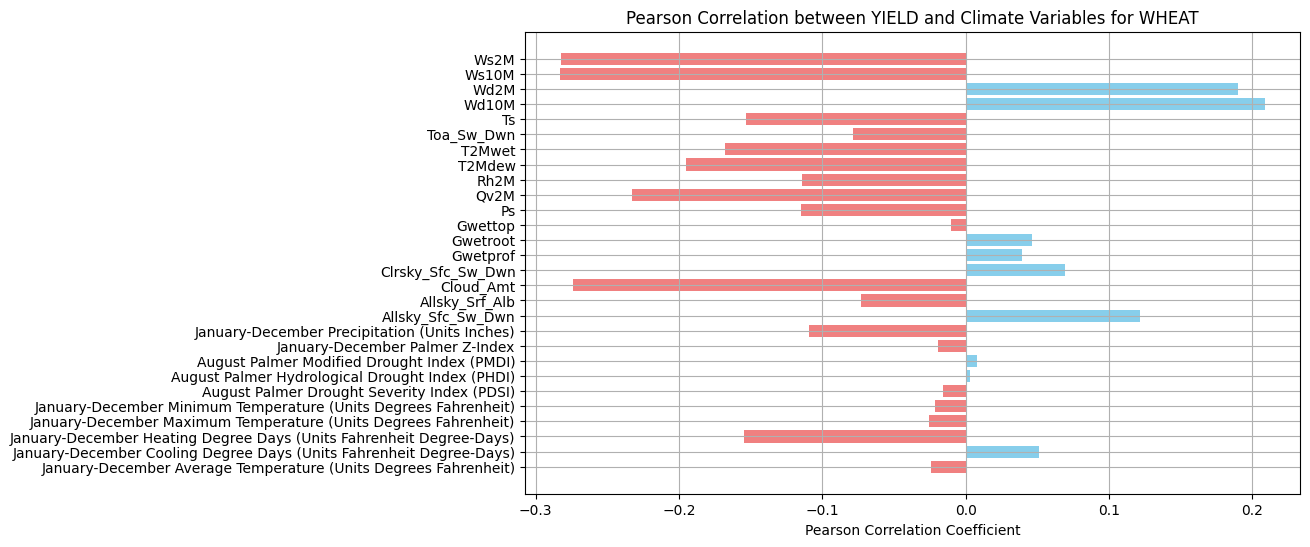

In [ ]:
# Example of how to use the function
commodity = 'WHEAT'  # Specify the commodity here
agriculture_metric = 'YIELD'  # Specify the agriculture metric here

pearson_correlation_agri_climate_df(commodity, agriculture_metric, f'Correlation for {commodity}')

### 2.1.2 Pearson correlation coefficients on agri_climate_df_encode.

In [ ]:
def pearson_correlation_agri_climate_df_encode(df, agriculture_metric, title):
    # Check if there are enough data points to compute correlations
    if len(df) < 2:
        print("Not enough data points. Skipping correlation computation.")
        return

    correlation_results = {}
    for independent_var in climate_columns_with_commodity:
        correlation_coefficient, _ = pearsonr(df[agriculture_metric], df[independent_var])
        correlation_results[independent_var] = correlation_coefficient

    # Print correlation results
    print(f"Pearson Correlation Coefficients - {agriculture_metric}:")
    for independent_var, corr_coeff in correlation_results.items():
        print(f"{independent_var}: {corr_coeff}")

    # Plotting correlation coefficients with different colors for positive and negative values
    plt.figure(figsize=(12, 8))

    # Define colors based on correlation sign
    bar_colors = ['skyblue' if corr > 0 else 'lightcoral' for corr in correlation_results.values()]

    # Plot horizontal bar chart
    plt.barh(climate_columns_with_commodity, [correlation_results[var] for var in climate_columns_with_commodity], color=bar_colors)

    plt.xlabel('Pearson Correlation Coefficient')
    plt.title(title)
    plt.grid(True)
    plt.show()

Pearson Correlation Coefficients - YIELD:
January-December Average Temperature (Units Degrees Fahrenheit): 0.15028010059789573
January-December Cooling Degree Days (Units Fahrenheit Degree-Days): 0.10507292284063989
January-December Heating Degree Days (Units Fahrenheit Degree-Days): -0.15936669277450358
January-December Maximum Temperature (Units Degrees Fahrenheit): 0.1562984044951683
January-December Minimum Temperature (Units Degrees Fahrenheit): 0.14062089725455434
August Palmer Drought Severity Index (PDSI): -0.011047729805975829
August Palmer Hydrological Drought Index (PHDI): -0.011862582337465476
August Palmer Modified Drought Index (PMDI): -0.010337917495095935
January-December Palmer Z-Index: -0.019709793057960574
January-December Precipitation (Units Inches): 0.025529945270918057
Allsky_Sfc_Sw_Dwn: 0.15909836375565475
Allsky_Srf_Alb: -0.07920024110901969
Cloud_Amt: -0.1963794189015048
Clrsky_Sfc_Sw_Dwn: 0.1369011769588918
Gwetprof: 0.04223038914076396
Gwetroot: 0.0483408369

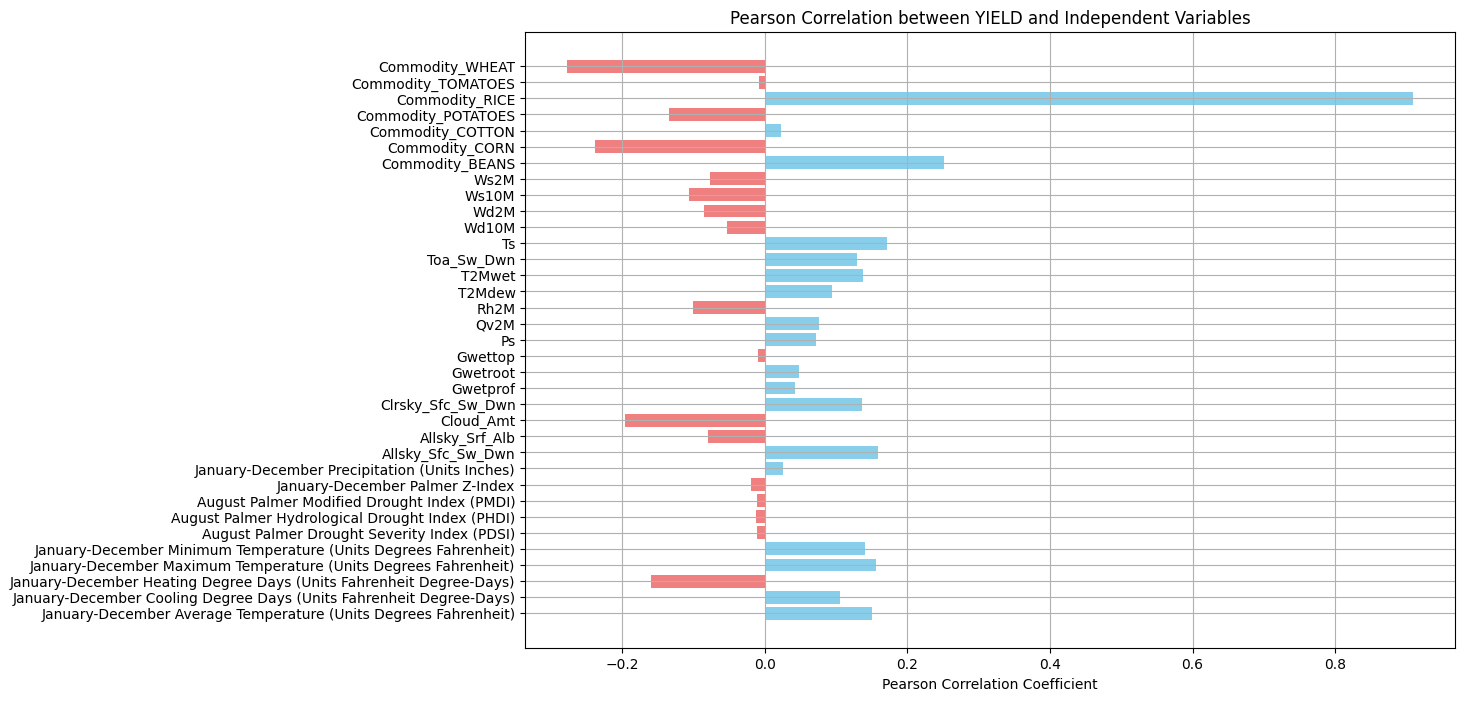

In [ ]:
# Example usage
agriculture_metric = 'YIELD'  # Specify the agriculture metric here
title = f'Pearson Correlation between {agriculture_metric} and Independent Variables'

# Assuming merged_agri_climate_eco_df_encoded is your dataframe
pearson_correlation_agri_climate_df_encode(agri_climate_df_encode, agriculture_metric, title)

## 2.2 Spearman Correlation
- Spearman Correlation: Measures the strength and direction of the monotonic relationship between two variables. This means it can capture relationships that are not necessarily linear but still have a consistent order (i.e., one variable consistently increases or decreases as the other increases).
- Pearson Correlation: Measures the linear relationship between two variables. It assumes that the relationship between the variables is linear and is sensitive to deviations from this linearity.


### 2.2.1 Spearman Correlation on agri_climate_df.

In [ ]:
# Function to compute Pearson correlation coefficients and plot results for a specific commodity
def spearman_correlation_agri_climate_df(commodity, agriculture_metric, title):
    # Filter dataframe for the specific commodity
    df_commodity = agri_climate_df[agri_climate_df['Commodity'] == commodity]

    # Check if there are enough data points to compute correlations
    if len(df_commodity) < 2:
        print(f"Not enough data points for {commodity}. Skipping correlation computation.")
        return

    correlation_results = {}
    for climate_var in climate_columns_without_commodity:
        correlation_coefficient, _ = spearmanr(df_commodity[agriculture_metric], df_commodity[climate_var])
        correlation_results[climate_var] = correlation_coefficient

    # Print correlation results
    print(f"Spearmanr Correlation Coefficients - {agriculture_metric} for {commodity}:")
    for climate_var, corr_coeff in correlation_results.items():
        print(f"{climate_var}: {corr_coeff}")

    # Plotting correlation coefficients with different colors for positive and negative values
    plt.figure(figsize=(10, 6))

    # Define colors based on correlation sign
    bar_colors = ['skyblue' if corr > 0 else 'lightcoral' for corr in correlation_results.values()]

    # Plot horizontal bar chart
    plt.barh(climate_columns_without_commodity, [correlation_results[var] for var in climate_columns_without_commodity], color=bar_colors)

    plt.xlabel('Spearman Correlation Coefficient')
    plt.title(f'Spearman Correlation between {agriculture_metric} and Climate Variables for {commodity}')
    plt.grid(True)
    plt.show()

Spearmanr Correlation Coefficients - YIELD for WHEAT:
January-December Average Temperature (Units Degrees Fahrenheit): -0.024999268875379062
January-December Cooling Degree Days (Units Fahrenheit Degree-Days): 0.006007925697239454
January-December Heating Degree Days (Units Fahrenheit Degree-Days): -0.11060189807678027
January-December Maximum Temperature (Units Degrees Fahrenheit): -0.05271599115793004
January-December Minimum Temperature (Units Degrees Fahrenheit): -0.007848725694439875
August Palmer Drought Severity Index (PDSI): -0.0032789240689770063
August Palmer Hydrological Drought Index (PHDI): 0.0178553701408237
August Palmer Modified Drought Index (PMDI): 0.01975001234940017
January-December Palmer Z-Index: -0.014051405628526198
January-December Precipitation (Units Inches): 0.0012352375353169973
Allsky_Sfc_Sw_Dwn: -0.0745898699265076
Allsky_Srf_Alb: -0.047438718106990505
Cloud_Amt: -0.1266997506312386
Clrsky_Sfc_Sw_Dwn: -0.0650218578682231
Gwetprof: 0.1237181237260361
Gwetr

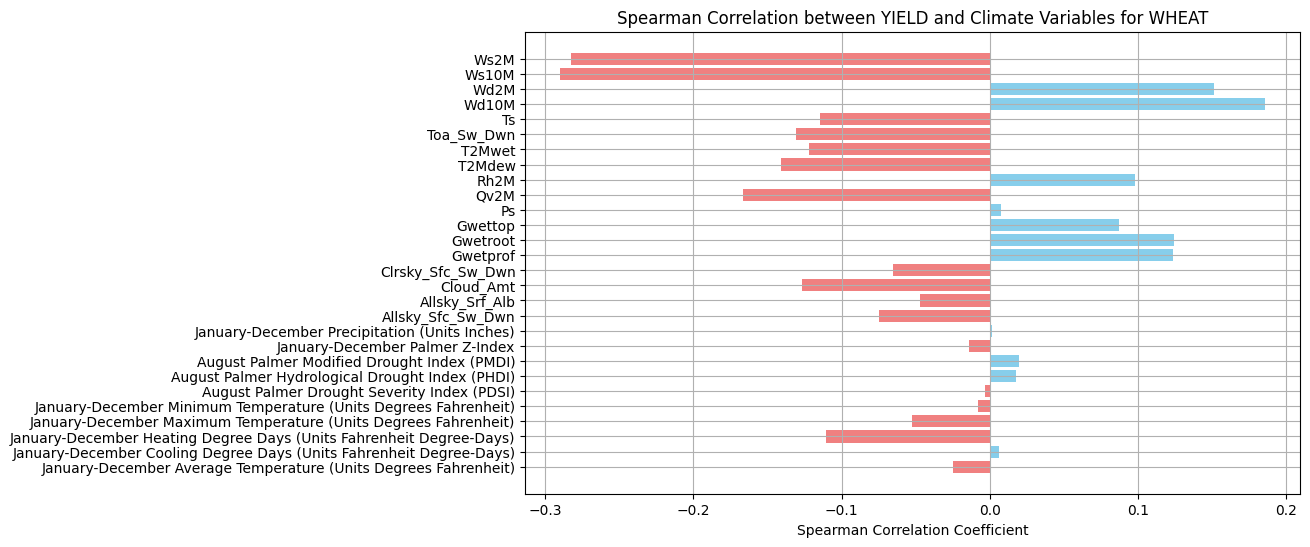

In [ ]:
# Example of how to use the function
commodity = 'WHEAT'  # Specify the commodity here
agriculture_metric = 'YIELD'  # Specify the agriculture metric here

spearman_correlation_agri_climate_df(commodity, agriculture_metric, f'Correlation for {commodity}')

### 2.2.2 Spearman Correlation on agri_climate_df_encode.

In [ ]:
def spearman_correlation_agri_climate_df_encode(df, agriculture_metric, title):
    # Check if there are enough data points to compute correlations
    if len(df) < 2:
        print("Not enough data points. Skipping correlation computation.")
        return

    correlation_results = {}
    for independent_var in climate_columns_with_commodity:
        correlation_coefficient, _ = spearmanr(df[agriculture_metric], df[independent_var])
        correlation_results[independent_var] = correlation_coefficient

    # Print correlation results
    print(f"Spearman Correlation Coefficients - {agriculture_metric}:")
    for independent_var, corr_coeff in correlation_results.items():
        print(f"{independent_var}: {corr_coeff}")

    # Plotting correlation coefficients with different colors for positive and negative values
    plt.figure(figsize=(12, 8))

    # Define colors based on correlation sign
    bar_colors = ['skyblue' if corr > 0 else 'lightcoral' for corr in correlation_results.values()]

    # Plot horizontal bar chart
    plt.barh(climate_columns_with_commodity, [correlation_results[var] for var in climate_columns_with_commodity], color=bar_colors)

    plt.xlabel('Spearman Correlation Coefficient')
    plt.title(title)
    plt.grid(True)
    plt.show()

Spearman Correlation Coefficients - YIELD:
January-December Average Temperature (Units Degrees Fahrenheit): 0.025063601624099364
January-December Cooling Degree Days (Units Fahrenheit Degree-Days): 0.001324217019133491
January-December Heating Degree Days (Units Fahrenheit Degree-Days): -0.06342237410306771
January-December Maximum Temperature (Units Degrees Fahrenheit): 0.032038912746182056
January-December Minimum Temperature (Units Degrees Fahrenheit): 0.01765850021805136
August Palmer Drought Severity Index (PDSI): 0.0007539250057070308
August Palmer Hydrological Drought Index (PHDI): 0.003050260393977309
August Palmer Modified Drought Index (PMDI): 0.006579401384748108
January-December Palmer Z-Index: -0.014129339650911864
January-December Precipitation (Units Inches): -0.07033526586807484
Allsky_Sfc_Sw_Dwn: 0.11052605282299387
Allsky_Srf_Alb: 0.0025439352667321617
Cloud_Amt: -0.15037129150034226
Clrsky_Sfc_Sw_Dwn: 0.08656003739137766
Gwetprof: -0.065568719558028
Gwetroot: -0.0712

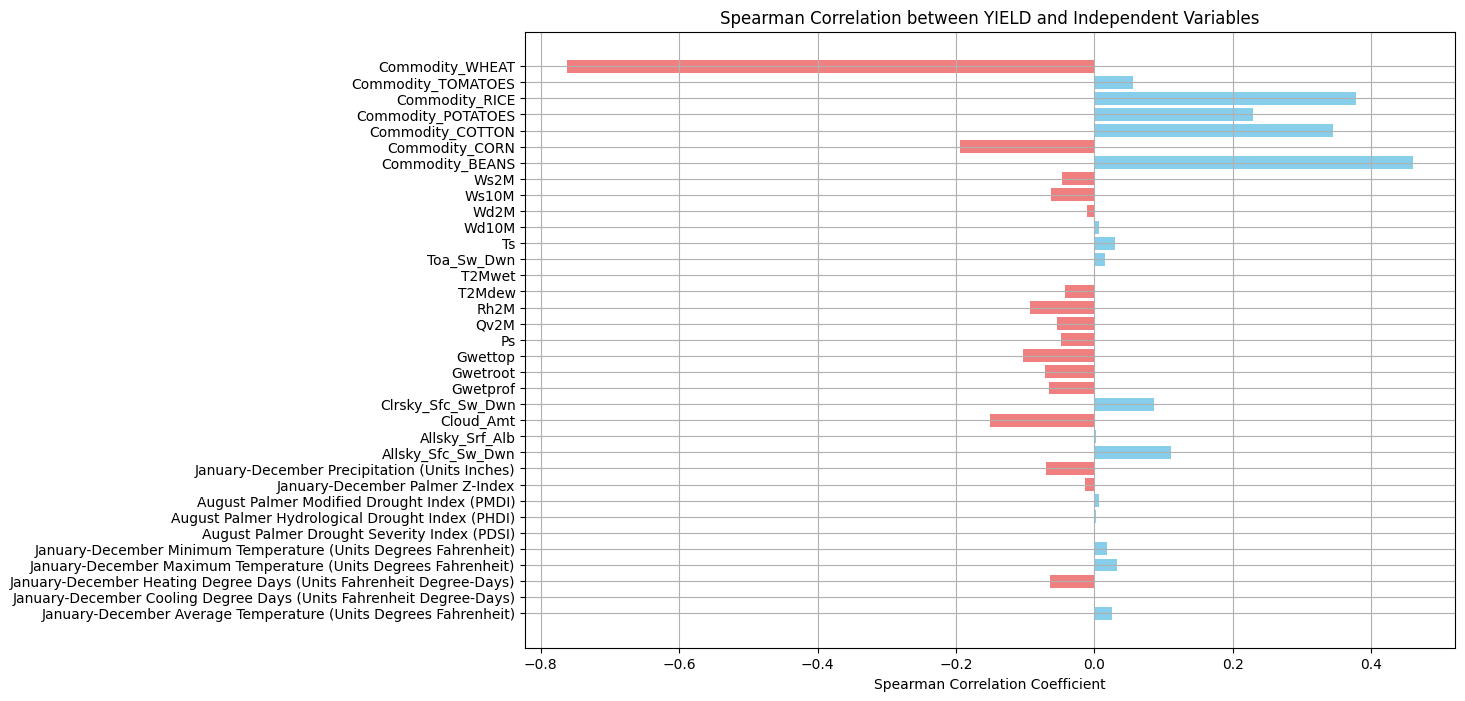

In [ ]:
# Example usage
agriculture_metric = 'YIELD'  # Specify the agriculture metric here
title = f'Spearman Correlation between {agriculture_metric} and Independent Variables'

# Assuming merged_agri_climate_eco_df_encoded is your dataframe
spearman_correlation_agri_climate_df_encode(agri_climate_df_encode, agriculture_metric, title)

## 2.3 Partial Correlation Coefficient.
- Partial correlation: Partial correlation measures the linear relationship between two variables while controlling for the effect of one or more additional variables. It provides insight into the direct relationship between two variables, excluding the influence of other variables.


### 2.3.1 Partial Correlation Coefficient on agri_climate_df.

In [ ]:
# Function to compute Partial correlation coefficients and plot results for a specific commodity
def partial_correlation_agri_climate_df(commodity, agriculture_metric, title):
    # Filter dataframe for the specific commodity
    df_commodity = agri_climate_df[agri_climate_df['Commodity'] == commodity]

    # Check if there are enough data points to compute partial correlations
    if len(df_commodity) < 3:  # At least 3 data points are needed for partial correlation
        print(f"Not enough data points for {commodity}. Skipping partial correlation computation.")
        return

    partial_corr_results = {}
    for climate_var in climate_columns_without_commodity:
        # List of climate variables to control for
        control_vars = [var for var in climate_columns_without_commodity if var != climate_var]

        # Compute partial correlation controlling for control_vars
        partial_corr_result = partial_corr(data=df_commodity, x=climate_var, y=agriculture_metric, covar=control_vars)
        partial_corr_coefficient = partial_corr_result['r'][0]  # Extract the partial correlation coefficient
        partial_corr_results[climate_var] = partial_corr_coefficient

    # Print partial correlation results
    print(f"Partial Correlation Coefficients - {agriculture_metric} for {commodity}:")
    for climate_var, partial_corr_coeff in partial_corr_results.items():
        print(f"{climate_var}: {partial_corr_coeff}")

    # Plotting partial correlation coefficients with different colors for positive and negative values
    plt.figure(figsize=(10, 6))

    # Define colors based on correlation sign
    bar_colors = ['skyblue' if corr > 0 else 'lightcoral' for corr in partial_corr_results.values()]

    # Plot horizontal bar chart
    plt.barh(climate_columns_without_commodity, [partial_corr_results[var] for var in climate_columns_without_commodity], color=bar_colors)

    plt.xlabel('Partial Correlation Coefficient')
    plt.title(f'Partial Correlation between {agriculture_metric} and Climate Variables for {commodity}')
    plt.grid(True)
    plt.show()

Partial Correlation Coefficients - YIELD for WHEAT:
January-December Average Temperature (Units Degrees Fahrenheit): 0.01394496652291427
January-December Cooling Degree Days (Units Fahrenheit Degree-Days): 0.12470035844071421
January-December Heating Degree Days (Units Fahrenheit Degree-Days): -0.37950571632241187
January-December Maximum Temperature (Units Degrees Fahrenheit): -0.0564691723420026
January-December Minimum Temperature (Units Degrees Fahrenheit): -0.006073908896260186
August Palmer Drought Severity Index (PDSI): -0.008150674215148831
August Palmer Hydrological Drought Index (PHDI): -0.005250159526886525
August Palmer Modified Drought Index (PMDI): 0.035022572554997314
January-December Palmer Z-Index: -0.06455469891748859
January-December Precipitation (Units Inches): 0.031575035602456024
Allsky_Sfc_Sw_Dwn: -0.020300859310028747
Allsky_Srf_Alb: -0.0067860314814802165
Cloud_Amt: -0.312652548294882
Clrsky_Sfc_Sw_Dwn: 0.050014244018149134
Gwetprof: -0.3218023085793611
Gwetro

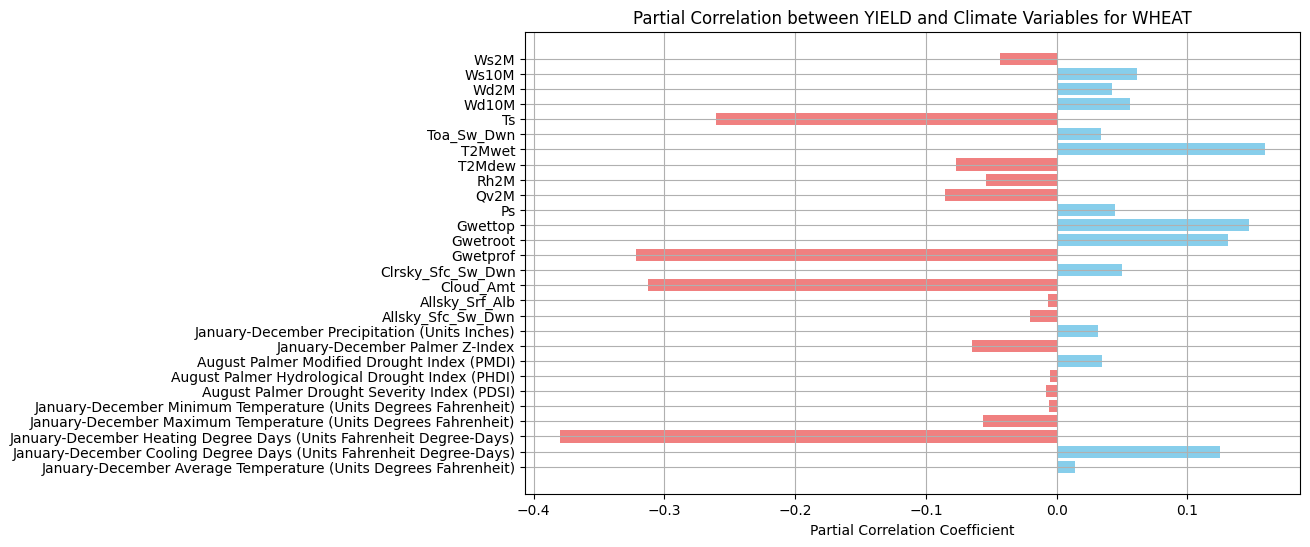

In [ ]:
# Example of how to use the function
commodity = 'WHEAT'  # Specify the commodity here
agriculture_metric = 'YIELD'  # Specify the agriculture metric here
partial_correlation_agri_climate_df(commodity, agriculture_metric, f'Partial Correlation for {commodity}')

### 2.3.2 Partial Correlation Coefficient on agri_climate_df_encode.

In [ ]:
# Function to compute and plot Partial Correlation Coefficients
def partial_correlation_agri_climate_df_encode(df, agriculture_metric, title):
    # Check if there are enough data points to compute correlations
    if len(df) < 2:
        print("Not enough data points. Skipping correlation computation.")
        return

    correlation_results = {}
    for independent_var in climate_columns_with_commodity:
        # Compute partial correlation controlling for all other variables
        control_vars = [var for var in climate_columns_with_commodity if var != independent_var]
        partial_corr = pg.partial_corr(data=df, x=agriculture_metric, y=independent_var, covar=control_vars, method='spearman')
        correlation_results[independent_var] = partial_corr['r'].values[0]

    # Print correlation results
    print(f"Partial Correlation Coefficients - {agriculture_metric}:")
    for independent_var, corr_coeff in correlation_results.items():
        print(f"{independent_var}: {corr_coeff}")

    # Plotting correlation coefficients with different colors for positive and negative values
    plt.figure(figsize=(12, 8))

    # Define colors based on correlation sign
    bar_colors = ['skyblue' if corr > 0 else 'lightcoral' for corr in correlation_results.values()]

    # Plot horizontal bar chart
    plt.barh(climate_columns_with_commodity, [correlation_results[var] for var in climate_columns_with_commodity], color=bar_colors)

    plt.xlabel('Partial Correlation Coefficient')
    plt.title(title)
    plt.grid(True)
    plt.show()

Partial Correlation Coefficients - YIELD:
January-December Average Temperature (Units Degrees Fahrenheit): 0.03275861756446307
January-December Cooling Degree Days (Units Fahrenheit Degree-Days): 0.0053109719713825216
January-December Heating Degree Days (Units Fahrenheit Degree-Days): -0.17533125704577168
January-December Maximum Temperature (Units Degrees Fahrenheit): -0.08248890472496798
January-December Minimum Temperature (Units Degrees Fahrenheit): 0.01548643884347584
August Palmer Drought Severity Index (PDSI): -0.00554320045141409
August Palmer Hydrological Drought Index (PHDI): -0.02477024720395937
August Palmer Modified Drought Index (PMDI): 0.04749910104158178
January-December Palmer Z-Index: -0.03900810860401872
January-December Precipitation (Units Inches): 0.033490886416514556
Allsky_Sfc_Sw_Dwn: -0.1353781932615837
Allsky_Srf_Alb: 0.0609919831820159
Cloud_Amt: -0.28572159376614703
Clrsky_Sfc_Sw_Dwn: 0.1775113464577461
Gwetprof: 0.004714244888008039
Gwetroot: 0.00685212061

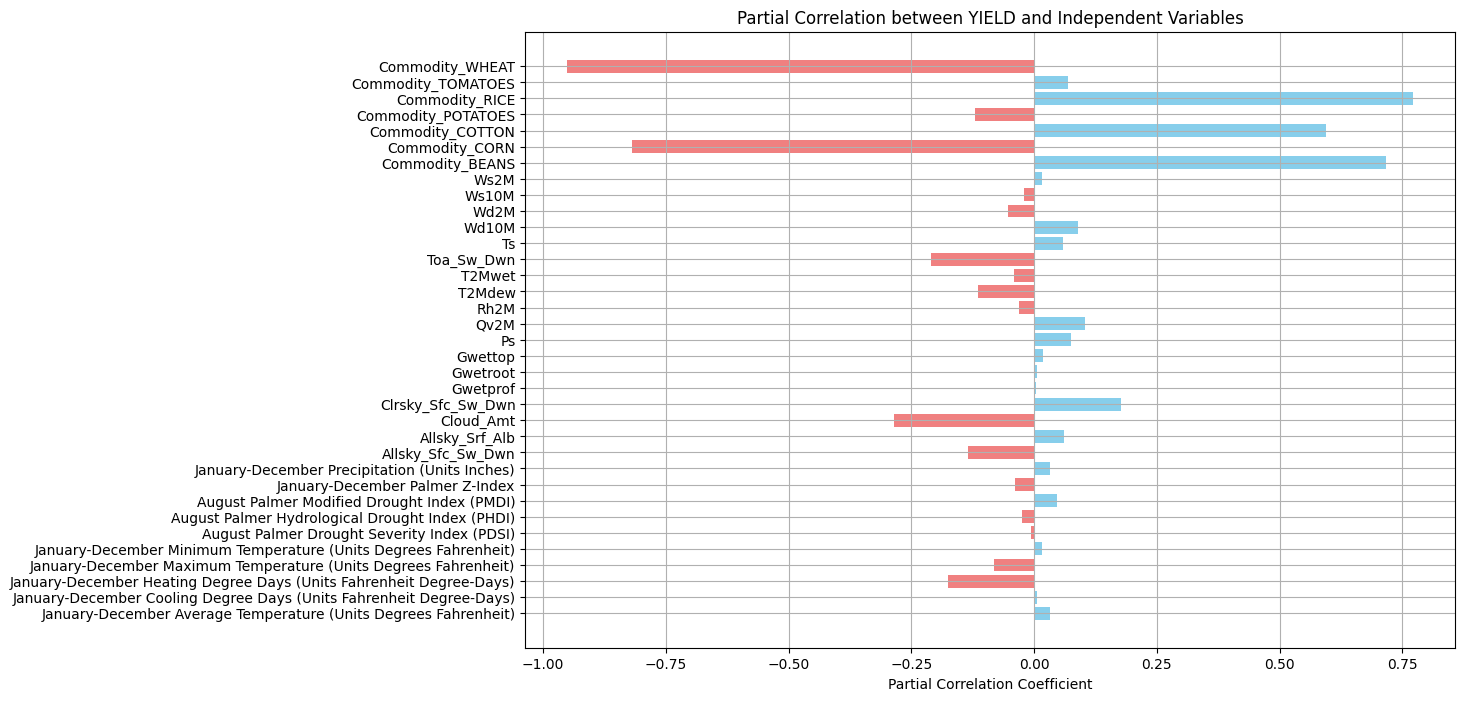

In [ ]:
agriculture_metric = 'YIELD'  # Specify the agriculture metric here
title = f'Partial Correlation between {agriculture_metric} and Independent Variables'

# Assuming agri_climate_df is your dataframe
partial_correlation_agri_climate_df_encode(agri_climate_df_encode, agriculture_metric, title)

# 3. Multiple Linear Regression with Anova.

## 3.1 Multiple Linear Regression with Anova on agri_climate_df.

In [ ]:
# Function to fit linear regression and get ANOVA table
def linear_regression_anova(df, commodity):
    # Filter dataframe for the given commodity
    df_commodity = df[df['Commodity'] == commodity]

    # Construct the formula for the regression model
    formula = 'Q("YIELD") ~ ' + ' + '.join([f'Q("{col}")' for col in climate_columns_without_commodity])  # Q() handles special characters

    # Fit the model
    model = ols(formula, data=df_commodity).fit()

    # Get the ANOVA table
    anova_table = anova.anova_lm(model, typ=2)

    return model.summary(), anova_table

In [ ]:
# Example usage
commodity = 'RICE'  # Replace with the desired commodity
model_summary, anova_table = linear_regression_anova(agri_climate_df, commodity)

print("Model Summary:")
model_summary


Model Summary:


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Q("YIELD")   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     32.43
Date:                Wed, 10 Jul 2024   Prob (F-statistic):           1.86e-60
Time:                        07:59:53   Log-Likelihood:                -340.40
No. Observations:                 234   AIC:                             738.8
Df Residuals:                     205   BIC:                             839.0
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
============================================================================================================================================
                                                                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                   11.6961      1.968      5.944      0.000       7.816      15.576
Q("January-December Average Temperature (Units Degrees Fahrenheit)")        51.0457     28.033      1.821      0.070      -4.224     106.315
Q("January-December Cooling Degree Days (Units Fahrenheit Degree-Days)")    -2.5914      1.762     -1.470      0.143      -6.066       0.883
Q("January-December Heating Degree Days (Units Fahrenheit Degree-Days)")     4.2524      4.860      0.875      0.383      -5.330      13.835
Q("January-December Maximum Temperature (Units Degrees Fahrenheit)")       -32.2042     16.048     -2.007      0.046     -63.844      -0.564
Q("January-December Minimum Temperature (Units Degrees Fahrenheit)")       -23.8952     14.116     -1.693      0.092     -51.725       3.935
Q("August Palmer Drought Severity Index (PDSI)")                            -0.1864      0.471     -0.396      0.692      -1.114       0.741
Q("August Palmer Hydrological Drought Index (PHDI)")                        -1.1902      0.563     -2.116      0.036      -2.299      -0.081
Q("August Palmer Modified Drought Index (PMDI)")                             0.8273      0.741      1.116      0.266      -0.634       2.288
Q("January-December Palmer Z-Index")                                        -0.6088      0.599     -1.016      0.311      -1.790       0.573
Q("January-December Precipitation (Units Inches)")                           1.5086      0.953      1.583      0.115      -0.370       3.388
Q("Allsky_Sfc_Sw_Dwn")                                                      -1.9725      1.042     -1.893      0.060      -4.027       0.082
Q("Allsky_Srf_Alb")                                                          0.7432      0.315      2.359      0.019       0.122       1.364
Q("Cloud_Amt")                                                              -2.1728      0.277     -7.837      0.000      -2.719      -1.626
Q("Clrsky_Sfc_Sw_Dwn")                                                       3.1426      1.120      2.805      0.006       0.934       5.351
Q("Gwetprof")                                                               -0.9378      2.529     -0.371      0.711      -5.923       4.048
Q("Gwetroot")                                                                0.9064      2.704      0.335      0.738      -4.424       6.237
Q("Gwettop")                                                                -1.1044      2.358     -0.468      0.640      -5.753       3.544
Q("Ps")                                                                    -15.7421      3.623     -4.346      0.000     -

## 3.2 Multiple Linear Regression with Anova on agri_climate_df_encode.

In [ ]:
import pandas as pd
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

def linear_regression_anova_encode(df):

    # Construct the formula for the regression model
    formula = 'Q("YIELD") ~ ' + ' + '.join([f'Q("{col}")' for col in climate_columns_with_commodity])

    # Fit the model
    model = ols(formula, data=df).fit()

    # Get the ANOVA table
    anova_table = anova_lm(model, typ=2)

    return model.summary(), anova_table


In [ ]:
# Usage example with merged_df_enco
model_summary, anova_table = linear_regression_anova_encode(agri_climate_df_encode)
print("Summary of the Regression Model:")
model_summary

Summary of the Regression Model:


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Q("YIELD")   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                     3418.
Date:                Wed, 10 Jul 2024   Prob (F-statistic):               0.00
Time:                        07:59:53   Log-Likelihood:                -4294.6
No. Observations:                4680   AIC:                             8659.
Df Residuals:                    4645   BIC:                             8885.
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
============================================================================================================================================
                                                                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                    2.0986      0.078     26.999      0.000       1.946       2.251
Q("January-December Average Temperature (Units Degrees Fahrenheit)")         3.6415      3.373      1.080      0.280      -2.972      10.255
Q("January-December Cooling Degree Days (Units Fahrenheit Degree-Days)")    -0.2075      0.073     -2.837      0.005      -0.351      -0.064
Q("January-December Heating Degree Days (Units Fahrenheit Degree-Days)")    -0.7791      0.127     -6.128      0.000      -1.028      -0.530
Q("January-December Maximum Temperature (Units Degrees Fahrenheit)")        -2.9755      1.853     -1.606      0.108      -6.608       0.657
Q("January-December Minimum Temperature (Units Degrees Fahrenheit)")        -1.7873      1.583     -1.129      0.259      -4.890       1.316
Q("August Palmer Drought Severity Index (PDSI)")                            -0.0429      0.049     -0.879      0.380      -0.138       0.053
Q("August Palmer Hydrological Drought Index (PHDI)")                        -0.1044      0.066     -1.575      0.115      -0.234       0.026
Q("August Palmer Modified Drought Index (PMDI)")                             0.0979      0.079      1.243      0.214      -0.056       0.252
Q("January-December Palmer Z-Index")                                         0.0521      0.039      1.342      0.180      -0.024       0.128
Q("January-December Precipitation (Units Inches)")                           0.0006      0.067      0.009      0.993      -0.132       0.133
Q("Allsky_Sfc_Sw_Dwn")                                                       0.0894      0.083      1.076      0.282      -0.073       0.252
Q("Allsky_Srf_Alb")                                                          0.0097      0.026      0.372      0.710      -0.041       0.061
Q("Cloud_Amt")                                                              -0.3259      0.031    -10.447      0.000      -0.387      -0.265
Q("Clrsky_Sfc_Sw_Dwn")                                                      -0.0081      0.081     -0.100      0.920      -0.166       0.150
Q("Gwetprof")                                                               -0.2450      0.118     -2.071      0.038      -0.477      -0.013
Q("Gwetroot")                                                                1.0544      0.175      6.008      0.000       0.710       1.398
Q("Gwettop")                                                                -0.9078      0.173     -5.236      0.000      -1.248      -0.568
Q("Ps")                                                                     -0.0559      0.074     -0.752      0.452      

- **we need to think if it makes sense to take commodity type as other independent variables, even though the R2 is significantly increased.**

# 4. Panel Regression, considering time effect.

## 4.1 Panel Regression on agri_climate_df.

In [ ]:
def panel_regression_with_time_effects(df, commodity):
    # Check if 'State' and 'Year' columns exist in the dataframe
    if 'State' not in df.columns or 'Year' not in df.columns:
        raise ValueError("Columns 'State' and 'Year' are required in the dataframe.")

    # Ensure the dataframe is sorted by State and Year
    df = df.sort_values(by=['State', 'Year'])

    # Filter dataframe for the given commodity
    df_commodity = df[df['Commodity'] == commodity]

    # Set MultiIndex (State, Year)
    df_commodity.set_index(['State', 'Year'], inplace=True)

    # Rename columns to simpler names
    rename_dict = {
        'January-December Average Temperature (Units Degrees Fahrenheit)': 'AvgTemp',
        'January-December Cooling Degree Days (Units Fahrenheit Degree-Days)': 'CoolingDegreeDays',
        'January-December Heating Degree Days (Units Fahrenheit Degree-Days)': 'HeatingDegreeDays',
        'January-December Maximum Temperature (Units Degrees Fahrenheit)': 'MaxTemp',
        'January-December Minimum Temperature (Units Degrees Fahrenheit)': 'MinTemp',
        'August Palmer Drought Severity Index (PDSI)': 'PDSI',
        'August Palmer Hydrological Drought Index (PHDI)': 'PHDI',
        'August Palmer Modified Drought Index (PMDI)': 'PMDI',
        'January-December Palmer Z-Index': 'PalmerZIndex',
        'January-December Precipitation (Units Inches)': 'Precipitation',
        'Allsky_Sfc_Sw_Dwn': 'AllskySfcSwDwn',
        'Allsky_Srf_Alb': 'AllskySrfAlb',
        'Cloud_Amt': 'CloudAmt',
        'Clrsky_Sfc_Sw_Dwn': 'ClrskySfcSwDwn',
        'Gwetprof': 'Gwetprof',
        'Gwetroot': 'Gwetroot',
        'Gwettop': 'Gwettop',
        'Ps': 'Ps',
        'Qv2M': 'Qv2M',
        'Rh2M': 'Rh2M',
        'T2Mdew': 'T2Mdew',
        'T2Mwet': 'T2Mwet',
        'Toa_Sw_Dwn': 'ToaSwDwn',
        'Ts': 'Ts',
        'Wd10M': 'Wd10M',
        'Wd2M': 'Wd2M',
        'Ws10M': 'Ws10M',
        'Ws2M': 'Ws2M'
    }
    df_commodity.rename(columns=rename_dict, inplace=True)

    # Create the formula
    formula = 'YIELD ~ ' + ' + '.join(rename_dict.values())

    # Perform panel regression with time effects
    model = PanelOLS.from_formula(formula, data=df_commodity)
    results = model.fit()

    return results

In [ ]:
# Example usage:
results = panel_regression_with_time_effects(agri_climate_df, 'WHEAT')
results

<ipython-input-35-4590c2bc95f2>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_commodity.rename(columns=rename_dict, inplace=True)


PanelOLS Estimation Summary                           
================================================================================
Dep. Variable:                  YIELD   R-squared:                        0.9844
Estimator:                   PanelOLS   R-squared (Between):              0.9948
No. Observations:                1270   R-squared (Within):              -0.6720
Date:                Wed, Jul 10 2024   R-squared (Overall):              0.9844
Time:                        07:59:56   Log-likelihood                    2584.9
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      2797.1
Entities:                          33   P-value                           0.0000
Avg Obs:                       38.485   Distribution:                 F(28,1242)
Min Obs:                       34.000                                           
Max Obs:                       39.000   F-statistic (robust):             2797.1
                                        P-value                           0.0000
Time periods:                      39   Distribution:                 F(28,1242)
Avg Obs:                       32.564                                           
Min Obs:                       29.000                                           
Max Obs:                       33.000                                           
                                                                                
                                 Parameter Estimates                                 
=====================================================================================
                   Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-------------------------------------------------------------------------------------
AvgTemp              -1.3347     0.3364    -3.9674     0.0001     -1.9947     -0.6747
CoolingDegreeDays     0.0246     0.0074     3.3054     0.0010      0.0100      0.0392
HeatingDegreeDays    -0.0960     0.0127    -7.5425     0.0000     -0.1209     -0.0710
MaxTemp               0.5217     0.1847     2.8248     0.0048      0.1594      0.8840
MinTemp               0.6065     0.1582     3.8333     0.0001      0.2961      0.9169
PDSI                 -0.0094     0.0049    -1.8942     0.0584     -0.0191      0.0003
PHDI                  0.0116     0.0067     1.7338     0.0832     -0.0015      0.0247
PMDI                  0.0255     0.0080     3.1901     0.0015      0.0098      0.0411
PalmerZIndex         -0.0384     0.0037    -10.409     0.0000     -0.0456     -0.0311
Precipitation         0.0410     0.0067     6.0950     0.0000      0.0278      0.0542
AllskySfcSwDwn       -0.0353     0.0080    -4.4005     0.0000     -0.0511     -0.0196
AllskySrfAlb         -0.0107     0.0026    -4.1459     0.0000     -0.0157     -0.0056
CloudAmt             -0.0194     0.0032    -6.0331     0.0000     -0.0257     -0.0131
ClrskySfcSwDwn        0.0196     0.0079     2.4842     0.0131      0.0041      0.0351
Gwetprof             -0.0693     0.0125    -5.5461     0.0000     -0.0938     -0.0448
Gwetroot             -0.0951     0.0172    -5.5173     0.0000     -0.1289     -0.0613
Gwettop               0.1852     0.0172     10.773     0.0000      0.1515      0.2190
Ps                   -0.0509     0.0072    -7.0275     0.0000     -0.0651     -0.0367
Qv2M                 -0.1293     0.0277    -4.6715     0.0000     -0.1835     -0.0750
Rh2M                  0.3865     0.0146     26.535     0.0000      0.3580      0.4151
T2Mdew               -2.3312     0.0450    -51.838     0.0000     -2.4194     -2.2430
T2Mwet                2.9859     0.0670     44.590     0.0000      2.8546      3.1173
ToaSwDwn              0.0659     0.0111     5.9526     0.0000      0.0442      0.0877
Ts                   -0.5376     0.0403    -13.339     0.0000     -0.6167     -0.4586
Wd10M                 0.0061     0.0028     2.1739     0.0299      0.0006      

## 4.2 Panel Regression for agri_climate_df_encode.

In [ ]:
import pandas as pd
from linearmodels.panel import PanelOLS

def panel_regression_with_time_effects(df, dependent_var='YIELD'):
    # Check if 'State' and 'Year' columns exist in the dataframe
    if 'State' not in df.columns or 'Year' not in df.columns:
        raise ValueError("Columns 'State' and 'Year' are required in the dataframe.")

    # Ensure the dataframe is sorted by State and Year
    df = df.sort_values(by=['State', 'Year'])

    # Set MultiIndex (State, Year)
    df.set_index(['State', 'Year'], inplace=True)

    # Rename columns to simpler names
    rename_dict = {
        'January-December Average Temperature (Units Degrees Fahrenheit)': 'AvgTemp',
        'January-December Cooling Degree Days (Units Fahrenheit Degree-Days)': 'CoolingDegreeDays',
        'January-December Heating Degree Days (Units Fahrenheit Degree-Days)': 'HeatingDegreeDays',
        'January-December Maximum Temperature (Units Degrees Fahrenheit)': 'MaxTemp',
        'January-December Minimum Temperature (Units Degrees Fahrenheit)': 'MinTemp',
        'August Palmer Drought Severity Index (PDSI)': 'PDSI',
        'August Palmer Hydrological Drought Index (PHDI)': 'PHDI',
        'August Palmer Modified Drought Index (PMDI)': 'PMDI',
        'January-December Palmer Z-Index': 'PalmerZIndex',
        'January-December Precipitation (Units Inches)': 'Precipitation',
        'Allsky_Sfc_Sw_Dwn': 'AllskySfcSwDwn',
        'Allsky_Srf_Alb': 'AllskySrfAlb',
        'Cloud_Amt': 'CloudAmt',
        'Clrsky_Sfc_Sw_Dwn': 'ClrskySfcSwDwn',
        'Gwetprof': 'Gwetprof',
        'Gwetroot': 'Gwetroot',
        'Gwettop': 'Gwettop',
        'Ps': 'Ps',
        'Qv2M': 'Qv2M',
        'Rh2M': 'Rh2M',
        'T2Mdew': 'T2Mdew',
        'T2Mwet': 'T2Mwet',
        'Toa_Sw_Dwn': 'ToaSwDwn',
        'Ts': 'Ts',
        'Wd10M': 'Wd10M',
        'Wd2M': 'Wd2M',
        'Ws10M': 'Ws10M',
        'Ws2M': 'Ws2M',
        'Commodity_BEANS': 'Commodity_BEANS',
        'Commodity_CORN': 'Commodity_CORN',
        'Commodity_COTTON': 'Commodity_COTTON',
        'Commodity_POTATOES': 'Commodity_POTATOES',
        'Commodity_RICE': 'Commodity_RICE',
        'Commodity_TOMATOES': 'Commodity_TOMATOES',
        'Commodity_WHEAT': 'Commodity_WHEAT'
    }
    df.rename(columns=rename_dict, inplace=True)

    # Create the formula
    formula = dependent_var + ' ~ ' + ' + '.join(rename_dict.values())

    # Perform panel regression with time effects
    model = PanelOLS.from_formula(formula, data=df)
    results = model.fit()

    return results

In [ ]:
# Example usage:
results = panel_regression_with_time_effects(agri_climate_df_encode, dependent_var='YIELD')
results

PanelOLS Estimation Summary                           
================================================================================
Dep. Variable:                  YIELD   R-squared:                        0.9616
Estimator:                   PanelOLS   R-squared (Between):              0.9878
No. Observations:                4680   R-squared (Within):               0.9557
Date:                Wed, Jul 10 2024   R-squared (Overall):              0.9616
Time:                        07:59:57   Log-likelihood                   -4294.6
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      3418.5
Entities:                          37   P-value                           0.0000
Avg Obs:                       126.49   Distribution:                 F(34,4645)
Min Obs:                       3.0000                                           
Max Obs:                       233.00   F-statistic (robust):             3908.8
                                        P-value                           0.0000
Time periods:                      39   Distribution:                 F(34,4645)
Avg Obs:                       120.00                                           
Min Obs:                       101.00                                           
Max Obs:                       125.00                                           
                                                                                
                                 Parameter Estimates                                  
======================================================================================
                    Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
--------------------------------------------------------------------------------------
AvgTemp                3.6415     3.3732     1.0795     0.2804     -2.9717      10.255
CoolingDegreeDays     -0.2075     0.0731    -2.8370     0.0046     -0.3508     -0.0641
HeatingDegreeDays     -0.7791     0.1271    -6.1283     0.0000     -1.0284     -0.5299
MaxTemp               -2.9755     1.8529    -1.6059     0.1084     -6.6081      0.6571
MinTemp               -1.7873     1.5827    -1.1292     0.2589     -4.8901      1.3156
PDSI                  -0.0429     0.0488    -0.8786     0.3797     -0.1385      0.0528
PHDI                  -0.1044     0.0662    -1.5755     0.1152     -0.2343      0.0255
PMDI                   0.0979     0.0788     1.2433     0.2138     -0.0565      0.2524
PalmerZIndex           0.0521     0.0388     1.3416     0.1798     -0.0240      0.1283
Precipitation          0.0006     0.0674     0.0094     0.9925     -0.1315      0.1328
AllskySfcSwDwn         0.0894     0.0830     1.0764     0.2818     -0.0734      0.2522
AllskySrfAlb           0.0097     0.0260     0.3723     0.7097     -0.0412      0.0606
CloudAmt              -0.3259     0.0312    -10.447     0.0000     -0.3870     -0.2647
ClrskySfcSwDwn        -0.0081     0.0805    -0.1005     0.9200     -0.1660      0.1498
Gwetprof              -0.2450     0.1183    -2.0707     0.0384     -0.4770     -0.0130
Gwetroot               1.0544     0.1755     6.0081     0.0000      0.7103      1.3984
Gwettop               -0.9078     0.1734    -5.2357     0.0000     -1.2477     -0.5679
Ps                    -0.0559     0.0744    -0.7519     0.4521     -0.2017      0.0899
Qv2M                   0.9191     0.2740     3.3548     0.0008      0.3820      1.4561
Rh2M                  -0.3882     0.2121    -1.8303     0.0673     -0.8040      0.0276
T2Mdew                 0.0387     0.9376     0.0413     0.9671     -1.7995      1.8769
T2Mwet                 0.9163     1.1683     0.7843     0.4329     -1.3741      3.2067
ToaSwDwn              -0.4773     0.1117    -4.2725     0.0000     -0.6964     -0.2583
Ts                    -1.1141     0.3991    -2.7918     0.0053     -1.8964     -0.3317
Wd10M                  0.0547     0.0284     1.9219

# 5. Detecting Multiconearity

## 5.1 Heatmap

### 5.1.1 Heatmap for agri_climate_df

In [ ]:
def plot_correlation_heatmap(df, commodity):
    """
    Plots a fancy heatmap of correlations among predictor variables for a specific commodity.

    Parameters:
    - df: The DataFrame containing the data.
    - commodity: The specific commodity to filter and include in the DataFrame.

    Returns:
    - None: Displays the heatmap plot.
    """
    # List of all columns related to the climate data


    # Mapping of long column names to shorter, concise names
    column_name_mapping = {
        'January-December Average Temperature (Units Degrees Fahrenheit)': 'Avg Temp (°F)',
        'January-December Cooling Degree Days (Units Fahrenheit Degree-Days)': 'Cooling Degree Days (°F)',
        'January-December Heating Degree Days (Units Fahrenheit Degree-Days)': 'Heating Degree Days (°F)',
        'January-December Maximum Temperature (Units Degrees Fahrenheit)': 'Max Temp (°F)',
        'January-December Minimum Temperature (Units Degrees Fahrenheit)': 'Min Temp (°F)',
        'August Palmer Drought Severity Index (PDSI)': 'PDSI',
        'August Palmer Hydrological Drought Index (PHDI)': 'PHDI',
        'August Palmer Modified Drought Index (PMDI)': 'PMDI',
        'January-December Palmer Z-Index': 'Palmer Z-Index',
        'January-December Precipitation (Units Inches)': 'Precipitation (Inches)',
        'Allsky_Sfc_Sw_Dwn': 'Allsky Sfc Sw Dwn',
        'Allsky_Srf_Alb': 'Allsky Srf Alb',
        'Cloud_Amt': 'Cloud Amt',
        'Clrsky_Sfc_Sw_Dwn': 'Clrsky Sfc Sw Dwn',
        'Gwetprof': 'Gwetprof',
        'Gwetroot': 'Gwetroot',
        'Gwettop': 'Gwettop',
        'Ps': 'Ps',
        'Qv2M': 'Qv2M',
        'Rh2M': 'Rh2M',
        'T2Mdew': 'T2Mdew',
        'T2Mwet': 'T2Mwet',
        'Toa_Sw_Dwn': 'Toa Sw Dwn',
        'Ts': 'Ts',
        'Wd10M': 'Wd10M',
        'Wd2M': 'Wd2M',
        'Ws10M': 'Ws10M',
        'Ws2M': 'Ws2M'
    }

    # Filter the DataFrame to include only rows for the specified commodity
    df_filtered = df[df['Commodity'] == commodity]

    # Rename columns in the filtered DataFrame
    df_filtered_short = df_filtered.rename(columns=column_name_mapping)

    # Calculate the correlation matrix for the specified commodity's climate columns
    correlation_matrix = df_filtered_short[list(column_name_mapping.values())].corr()

    # Set up the matplotlib figure with larger dimensions for better readability
    plt.figure(figsize=(20, 16))

    # Create the heatmap with enhanced styling
    heatmap = sns.heatmap(
        correlation_matrix,
        annot=True,
        fmt=".2f",
        cmap='coolwarm',
        vmin=-1,
        vmax=1,
        linewidths=1,
        linecolor='gray',
        cbar_kws={'shrink': 0.8, 'aspect': 40, 'pad': 0.02},
        annot_kws={'size': 8, 'weight': 'bold', 'color': 'black'}
    )

    # Customize the title and labels with larger fonts
    plt.title(f'Correlation Heatmap of Predictor Variables for {commodity}', fontsize=24, weight='bold')
    plt.xticks(fontsize=14, rotation=45, ha='right', weight='bold')
    plt.yticks(fontsize=14, rotation=0, weight='bold')

    # Adjust the layout for better spacing
    plt.tight_layout()

    # Display the heatmap
    plt.show()

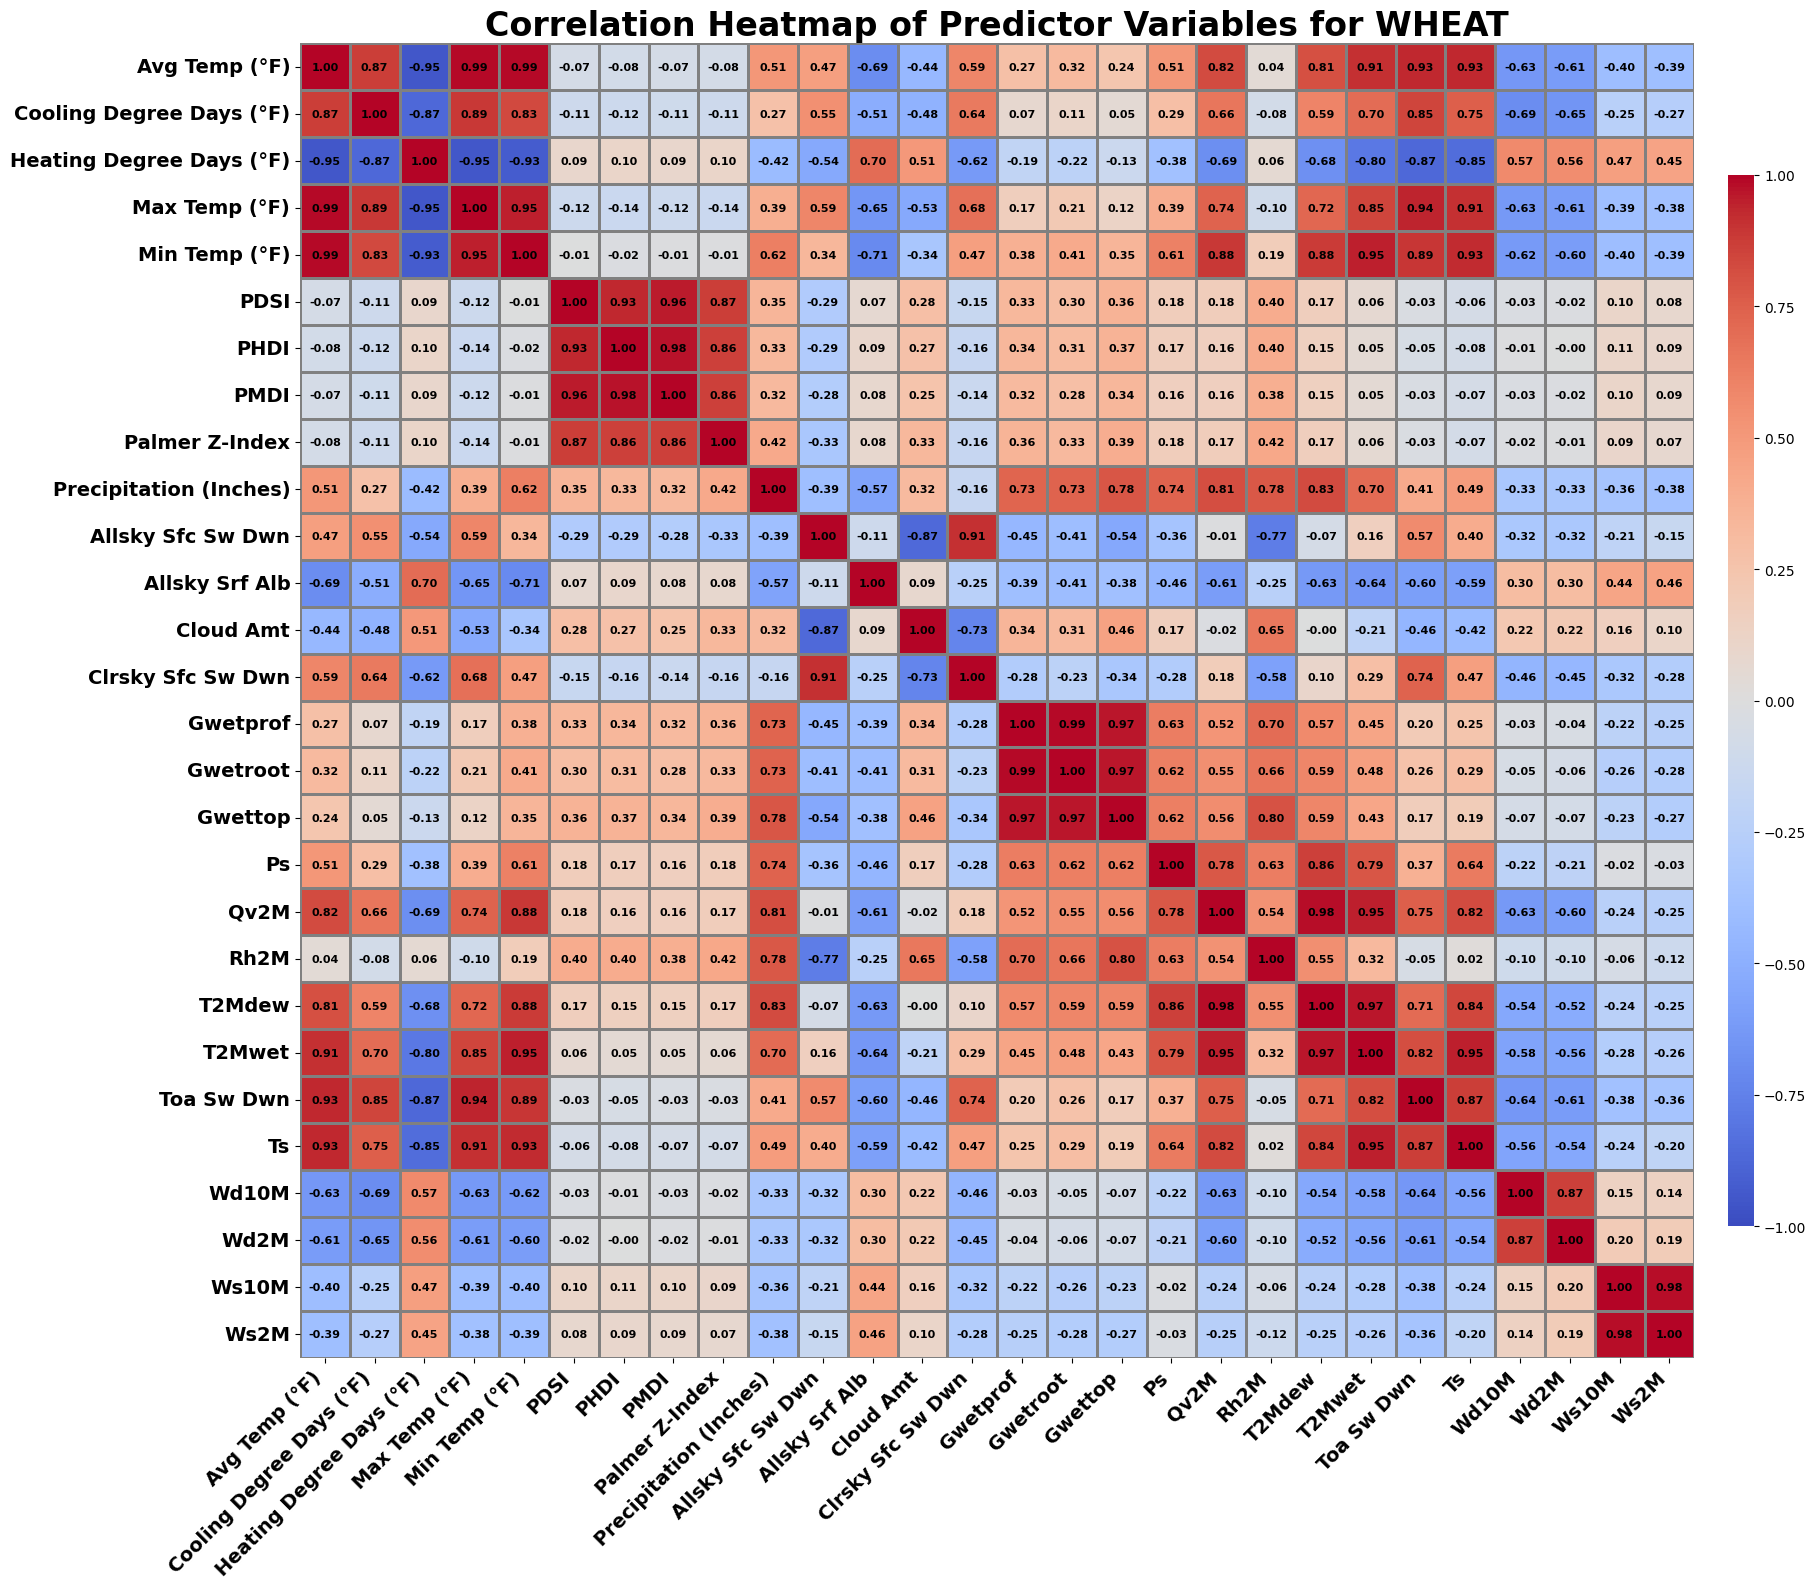

In [ ]:
# Example usage:
plot_correlation_heatmap(agri_climate_df, commodity='WHEAT')

### 5.1.2 Heatmap for agri_climate_df_encode

In [ ]:
def plot_correlation_heatmap_encoded(df):
    """
    Plots a fancy heatmap of correlations among predictor variables, including encoded commodity columns.

    Parameters:
    - df: The DataFrame containing the data.

    Returns:
    - None: Displays the heatmap plot.
    """
    # Mapping of long column names to shorter, concise names
    column_name_mapping = {
        'January-December Average Temperature (Units Degrees Fahrenheit)': 'Avg Temp (°F)',
        'January-December Cooling Degree Days (Units Fahrenheit Degree-Days)': 'Cooling Degree Days (°F)',
        'January-December Heating Degree Days (Units Fahrenheit Degree-Days)': 'Heating Degree Days (°F)',
        'January-December Maximum Temperature (Units Degrees Fahrenheit)': 'Max Temp (°F)',
        'January-December Minimum Temperature (Units Degrees Fahrenheit)': 'Min Temp (°F)',
        'August Palmer Drought Severity Index (PDSI)': 'PDSI',
        'August Palmer Hydrological Drought Index (PHDI)': 'PHDI',
        'August Palmer Modified Drought Index (PMDI)': 'PMDI',
        'January-December Palmer Z-Index': 'Palmer Z-Index',
        'January-December Precipitation (Units Inches)': 'Precipitation (Inches)',
        'Allsky_Sfc_Sw_Dwn': 'Allsky Sfc Sw Dwn',
        'Allsky_Srf_Alb': 'Allsky Srf Alb',
        'Cloud_Amt': 'Cloud Amt',
        'Clrsky_Sfc_Sw_Dwn': 'Clrsky Sfc Sw Dwn',
        'Gwetprof': 'Gwetprof',
        'Gwetroot': 'Gwetroot',
        'Gwettop': 'Gwettop',
        'Ps': 'Ps',
        'Qv2M': 'Qv2M',
        'Rh2M': 'Rh2M',
        'T2Mdew': 'T2Mdew',
        'T2Mwet': 'T2Mwet',
        'Toa_Sw_Dwn': 'Toa Sw Dwn',
        'Ts': 'Ts',
        'Wd10M': 'Wd10M',
        'Wd2M': 'Wd2M',
        'Ws10M': 'Ws10M',
        'Ws2M': 'Ws2M',
        'Commodity_BEANS': 'BEANS',
        'Commodity_CORN': 'CORN',
        'Commodity_COTTON': 'COTTON',
        'Commodity_POTATOES': 'POTATOES',
        'Commodity_RICE': 'RICE',
        'Commodity_TOMATOES': 'TOMATOES',
        'Commodity_WHEAT': 'WHEAT'
    }

    # Rename columns in the DataFrame
    df_short = df.rename(columns=column_name_mapping)

    # Calculate the correlation matrix for the climate columns and encoded commodity columns
    correlation_matrix = df_short[list(column_name_mapping.values())].corr()

    # Set up the matplotlib figure with larger dimensions for better readability
    plt.figure(figsize=(20, 16))

    # Create the heatmap with enhanced styling
    heatmap = sns.heatmap(
        correlation_matrix,
        annot=True,
        fmt=".2f",
        cmap='coolwarm',
        vmin=-1,
        vmax=1,
        linewidths=1,
        linecolor='gray',
        cbar_kws={'shrink': 0.8, 'aspect': 40, 'pad': 0.02},
        annot_kws={'size': 8, 'weight': 'bold', 'color': 'black'}
    )

    # Customize the title and labels with larger fonts
    plt.title('Correlation Heatmap of Predictor Variables Including Encoded Commodity Columns', fontsize=24, weight='bold')
    plt.xticks(fontsize=14, rotation=45, ha='right', weight='bold')
    plt.yticks(fontsize=14, rotation=0, weight='bold')

    # Adjust the layout for better spacing
    plt.tight_layout()

    # Display the heatmap
    plt.show()

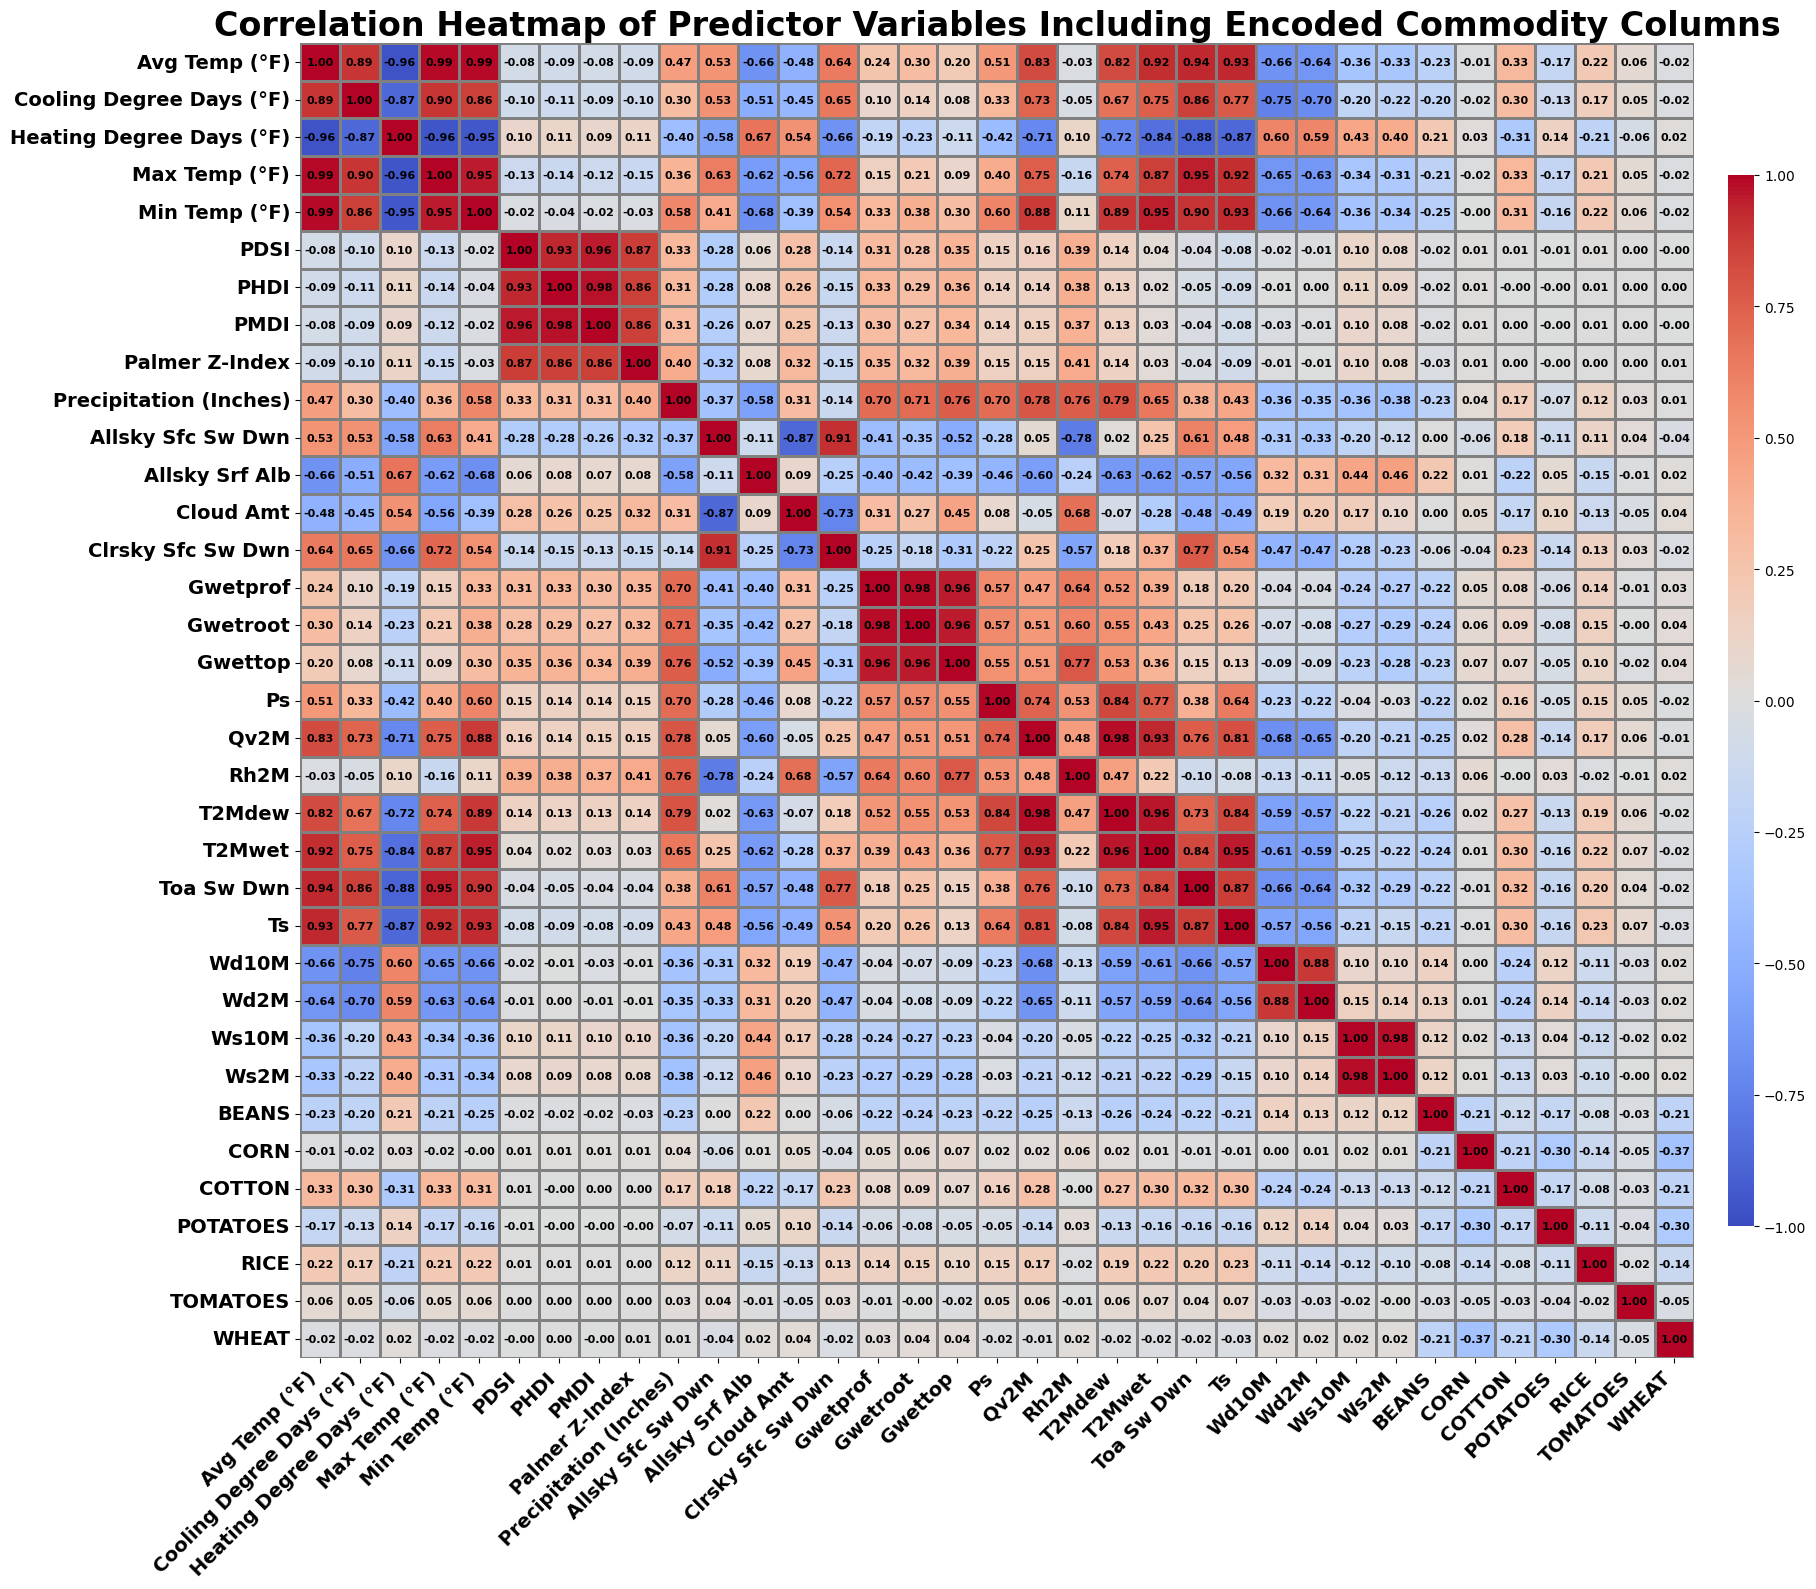

In [ ]:
# Example usage:
plot_correlation_heatmap_encoded(agri_climate_df_encode)


## 5.2 Detecting Multilinearity - Variance Inflation Factor
- VIF = 1:
𝑅2=0, This means there is no correlation between the predictor and the other predictors. The predictor is providing unique information.
- VIF = 2:
𝑅2=0.5, This means that 50% of the variance in the predictor can be explained by the other predictors. There is moderate correlation, but it's generally acceptable.
- VIF = 5:
𝑅2=0.8, This means that 80% of the variance in the predictor can be explained by the other predictors. This indicates a higher level of multicollinearity, which may start to be problematic.
- VIF = 10:
𝑅2=0.9, This means that 90% of the variance in the predictor can be explained by the other predictors. This indicates significant multicollinearity, which is often considered problematic.
- VIF = 20:
𝑅2=0.95, This means that 95% of the variance in the predictor can be explained by the other predictors. This indicates very severe multicollinearity, which is almost always problematic and suggests that the predictor might not be providing unique information.

### 5.2.1 Detecting Multilinearity for agri_climate_df.

In [ ]:
def calculate_vif(agri_climate_df, commodity):
    # Filter the dataframe for the specified commodity
    df = agri_climate_df[agri_climate_df['Commodity'] == commodity]

    # Check if the filtered dataframe is empty
    if df.empty:
        return f"No data available for the commodity: {commodity}"


    # Extract the X data
    X = df[climate_columns_without_commodity]

    # Adding constant term for VIF calculation
    X = X.assign(Intercept=1)

    # Calculate VIF for each feature
    vif_data = pd.DataFrame()
    vif_data["Feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    # Remove the Intercept from the VIF data
    vif_data = vif_data[vif_data["Feature"] != "Intercept"]

    return vif_data

In [ ]:
# Example usage
# agri_climate_df = pd.read_csv("your_data.csv")  # Assuming your dataframe is loaded here
commodity = "WHEAT"
vif_result = calculate_vif(agri_climate_df, commodity)
vif_result

Feature           VIF
0   January-December Average Temperature (Units De...  48722.841859
1   January-December Cooling Degree Days (Units Fa...     29.326415
2   January-December Heating Degree Days (Units Fa...     63.339990
3   January-December Maximum Temperature (Units De...  12644.247241
4   January-December Minimum Temperature (Units De...  12690.971167
5         August Palmer Drought Severity Index (PDSI)     14.346621
6     August Palmer Hydrological Drought Index (PHDI)     23.413793
7         August Palmer Modified Drought Index (PMDI)     37.417942
8                     January-December Palmer Z-Index      9.891274
9       January-December Precipitation (Units Inches)     25.273919
10                                  Allsky_Sfc_Sw_Dwn     32.480313
11                                     Allsky_Srf_Alb      3.812989
12                                          Cloud_Amt      7.622405
13                                  Clrsky_Sfc_Sw_Dwn     33.265299
14                                           Gwetprof     66.694369
15                                           Gwetroot    150.591242
16                                            Gwettop    147.921585
17                                                 Ps     55.846094
18                                               Qv2M    362.643386
19                                               Rh2M    322.597300
20                                             T2Mdew   4720.097018
21                                             T2Mwet   6214.250617
22                                         Toa_Sw_Dwn     45.699961
23                                                 Ts    701.125868
24                                              Wd10M      5.446578
25                                               Wd2M      4.420835
26                                              Ws10M    123.524263
27                                               Ws2M    104.419181

### 5.2.2 Detecting Multilinearity for agri_climate_df_encode.

In [ ]:
def calculate_vif_for_encoded_df(agri_climate_df_encode, climate_columns_with_commodity):
    # Extract the X data
    X = agri_climate_df_encode[climate_columns_with_commodity]

    # Adding constant term for VIF calculation
    X = X.assign(Intercept=1)

    # Calculate VIF for each feature
    vif_data = pd.DataFrame()
    vif_data["Feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    # Remove the Intercept from the VIF data
    vif_data = vif_data[vif_data["Feature"] != "Intercept"]

    return vif_data

In [ ]:
vif_result = calculate_vif_for_encoded_df(agri_climate_df_encode, climate_columns_with_commodity)
vif_result

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


Feature           VIF
0   January-December Average Temperature (Units De...  5.427635e+04
1   January-December Cooling Degree Days (Units Fa...  3.280162e+01
2   January-December Heating Degree Days (Units Fa...  7.055618e+01
3   January-December Maximum Temperature (Units De...  1.420214e+04
4   January-December Minimum Temperature (Units De...  1.394585e+04
5         August Palmer Drought Severity Index (PDSI)  1.412025e+01
6     August Palmer Hydrological Drought Index (PHDI)  2.331920e+01
7         August Palmer Modified Drought Index (PMDI)  3.680014e+01
8                     January-December Palmer Z-Index  9.874368e+00
9       January-December Precipitation (Units Inches)  2.449558e+01
10                                  Allsky_Sfc_Sw_Dwn  3.817473e+01
11                                     Allsky_Srf_Alb  3.764678e+00
12                                          Cloud_Amt  8.231020e+00
13                                  Clrsky_Sfc_Sw_Dwn  3.769450e+01
14                                           Gwetprof  5.793894e+01
15                                           Gwetroot  1.353405e+02
16                                            Gwettop  1.366606e+02
17                                                 Ps  5.253367e+01
18                                               Qv2M  3.786968e+02
19                                               Rh2M  3.204189e+02
20                                             T2Mdew  4.711129e+03
21                                             T2Mwet  6.514254e+03
22                                         Toa_Sw_Dwn  5.075328e+01
23                                                 Ts  7.520680e+02
24                                              Wd10M  6.552393e+00
25                                               Wd2M  5.137804e+00
26                                              Ws10M  1.321652e+02
27                                               Ws2M  1.115480e+02
28                                    Commodity_BEANS           inf
29                                     Commodity_CORN           inf
30                                   Commodity_COTTON           inf
31                                 Commodity_POTATOES           inf
32                                     Commodity_RICE           inf
33                                 Commodity_TOMATOES           inf
34                                    Commodity_WHEAT           inf

The "inf" values for the VIF indicate perfect multicollinearity, meaning that the columns in question are perfectly linearly dependent on other columns. In your case, the issue is likely due to the one-hot encoded "Commodity" columns.

Why This Happens:
One-hot encoding a categorical variable with
𝑛 categories creates
𝑛 binary columns, where each column represents a category. However, if you include all
𝑛 columns in the regression model, there will be perfect multicollinearity because the sum of all the one-hot encoded columns is always 1. This is a classic case of the "dummy variable trap."

Solution:
To avoid perfect multicollinearity, you should drop one of the one-hot encoded columns. This way, you still capture the information about the categorical variable but avoid redundancy.

# 6. Partial Least Square Regression - helps to deal with Multiconnearity.

PLSR creates latent variables (components) that are linear combinations of the original predictors. These components are chosen to maximize the covariance between the predictors and the response variable.

By transforming the original predictors into a smaller number of components, PLSR effectively reduces the dimensionality of the data. This helps to mitigate the effects of multicollinearity because the components are orthogonal (uncorrelated) to each other.

The response variable is then regressed on these latent variables, which are fewer in number and uncorrelated, improving the stability and interpretability of the regression model.

**By examining the loadings of the original variables on the PLS components, we can infer which original variables contribute most to the components that explain the response variable. It makes sense to focus on the latent component that has the highest coefficient in terms of its influence on the response variable, and the extract the loading weight of the original variables on this most important latent component.**

## 6.1 Partial Least Square Regression on agri_climate_df.

No optimal number of components found. Using the maximum number of components: 28
PLS Regression Formula for YIELD in Latent Space:
YIELD = +0.0870 * Latent_1 + +0.0138 * Latent_2 + -0.0723 * Latent_3 + -0.1457 * Latent_4 + -0.0280 * Latent_5 + +0.0014 * Latent_6 + -0.0023 * Latent_7 + +0.0042 * Latent_8 + -0.0036 * Latent_9 + +0.0014 * Latent_10 + -0.0056 * Latent_11 + -0.0003 * Latent_12 + -0.0201 * Latent_13 + +0.0091 * Latent_14 + -0.0581 * Latent_15 + +0.0349 * Latent_16 + +0.0381 * Latent_17 + +0.0107 * Latent_18 + -0.0282 * Latent_19 + -0.0208 * Latent_20 + -0.1269 * Latent_21 + +0.2782 * Latent_22 + +0.0029 * Latent_23 + -0.1539 * Latent_24 + +0.0023 * Latent_25 + +0.0020 * Latent_26 + +0.0133 * Latent_27 + -0.0083 * Latent_28
Model Metrics: {'MSE': 0.0004615625452967452, 'R^2': 0.677185114363108}

Loadings for the Latent Component with the Highest Absolute Coefficient:
                                             Variable   Loading
4   January-December Minimum Temperature (Uni

/usr/local/lib/python3.10/dist-packages/sklearn/cross_decomposition/_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


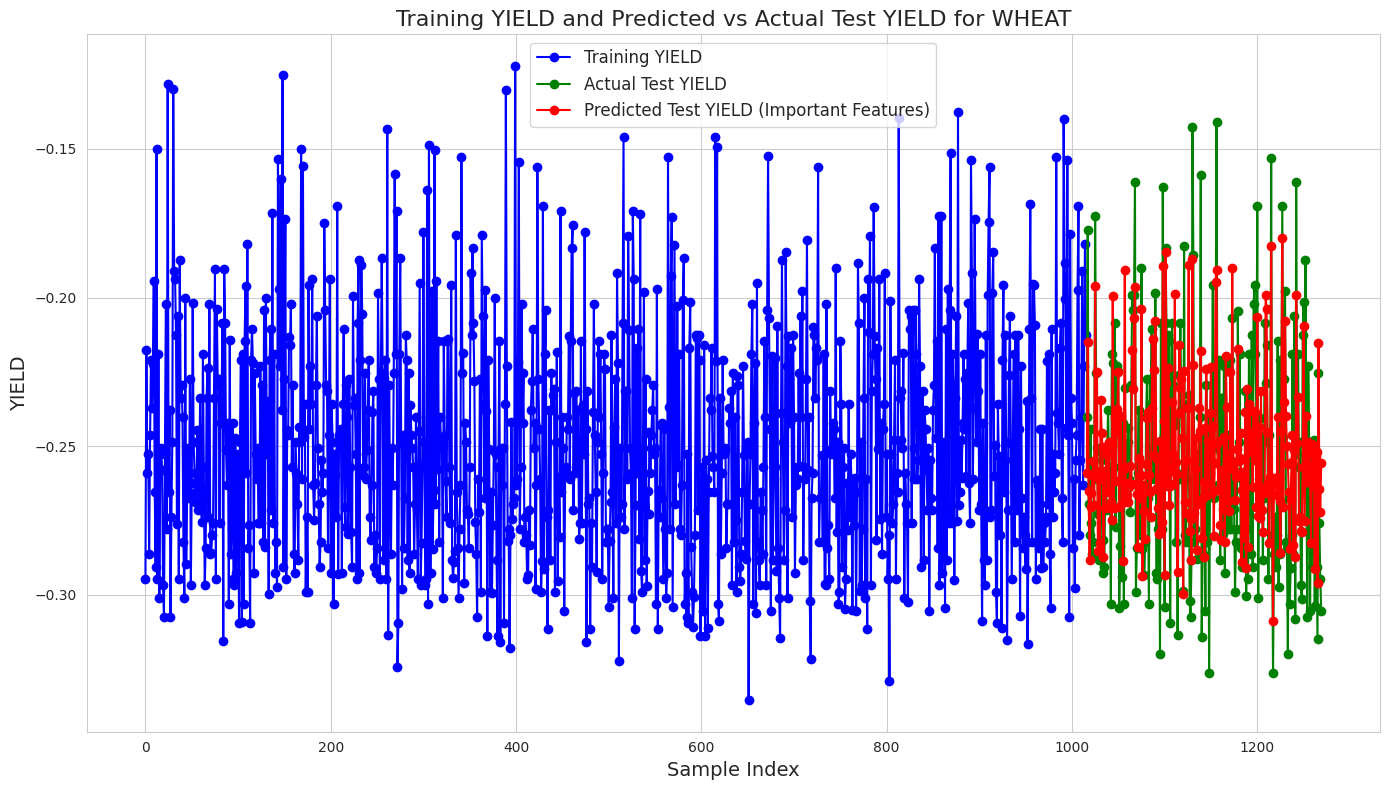

In [ ]:
def pls_regression_auto_components(df, commodity, target_column, climate_columns_without_commodity, threshold=0.8, test_size=0.2):
    # Filter the DataFrame based on the specified commodity
    df_filtered = df[df['Commodity'] == commodity]

    if df_filtered.empty or len(df_filtered) < 2:
        raise ValueError(f"Not enough samples for commodity '{commodity}' to perform train-test split.")

    # Define X and y
    X = df_filtered[climate_columns_without_commodity]
    y = df_filtered[target_column]

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

    # Determine the optimal number of components
    max_components = min(len(X_train), len(climate_columns_without_commodity), X_train.shape[1], y_train.shape[0])
    best_n_components = None
    best_r2 = -float('inf')
    for n_components in range(1, max_components + 1):
        pls_model = PLSRegression(n_components=n_components)
        pls_model.fit(X_train, y_train)
        y_train_pred = pls_model.predict(X_train)
        train_r2 = r2_score(y_train, y_train_pred)
        if train_r2 >= threshold:
            if train_r2 > best_r2:
                best_r2 = train_r2
                best_n_components = n_components
            print(f"Optimal number of components: {n_components}")
            break
    else:
        # If no n_components reach the threshold, use the maximum possible components
        best_n_components = max_components
        print(f"No optimal number of components found. Using the maximum number of components: {best_n_components}")

    # Apply PLS Regression with the determined number of components
    pls_model = PLSRegression(n_components=best_n_components)
    pls_model.fit(X_train, y_train)

    # Predict on the training set
    y_train_pred = pls_model.predict(X_train)

    # Predict on the test set
    y_pred = pls_model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    model_metrics = {'MSE': mse, 'R^2': r2}

    # Find the latent component with the highest absolute coefficient value
    component_coefficients = pls_model.coef_.flatten()
    max_coeff_idx = abs(component_coefficients).argmax()

    # Ensure index is within bounds
    if max_coeff_idx >= best_n_components:
        max_coeff_idx = best_n_components - 1

    # Extract the loadings for the component with the highest coefficient
    loadings = pls_model.x_loadings_[:, max_coeff_idx]  # Loadings for the selected component

    # Create a DataFrame with variable names and their corresponding loadings
    loadings_df = pd.DataFrame({
        'Variable': climate_columns_without_commodity,
        'Loading': loadings
    })

    # Sort the DataFrame by the absolute value of the loadings in descending order
    loadings_df = loadings_df.reindex(loadings_df['Loading'].abs().sort_values(ascending=False).index)

    # Print the final formula in the latent space
    coef = component_coefficients  # Coefficients for the latent components
    print(f'PLS Regression Formula for {target_column} in Latent Space:')
    formula_terms = " + ".join(f"{coef[i]:+.4f} * Latent_{i+1}" for i in range(len(coef)))
    print(f"YIELD = {formula_terms}")

    print(f'Model Metrics: {model_metrics}')
    print("\nLoadings for the Latent Component with the Highest Absolute Coefficient:")
    print(loadings_df)

    # Extract the top N important features (for example, top 10 features)
    top_features = loadings_df.head(10)['Variable'].values
    print(f"Top features: {top_features}")

    # Create a new DataFrame with only the top features
    X_important_train = X_train[top_features]
    X_important_test = X_test[top_features]

    # Train a new PLS model with the important features
    pls_model_important = PLSRegression(n_components=min(best_n_components, len(top_features), X_important_train.shape[1]))
    pls_model_important.fit(X_important_train, y_train)

    # Predict with the important features
    y_pred_important_train = pls_model_important.predict(X_important_train)
    y_pred_important_test = pls_model_important.predict(X_important_test)

    # Evaluate the new model
    mse_important = mean_squared_error(y_test, y_pred_important_test)
    r2_important = r2_score(y_test, y_pred_important_test)

    model_metrics_important = {'MSE': mse_important, 'R^2': r2_important}

    print(f'\nModel Metrics with Important Features: {model_metrics_important}')

    # Plot the training set yield and the prediction vs actual for the test set
    plt.figure(figsize=(14, 8))
    sns.set_style("whitegrid")

    # Plot training set yield
    plt.plot(range(len(y_train)), y_train, 'o-', label='Training YIELD', color='blue')

    # Plot the actual and predicted values for the test set
    plt.plot(range(len(y_train), len(y_train) + len(y_test)), y_test, 'o-', label='Actual Test YIELD', color='green')
    plt.plot(range(len(y_train), len(y_train) + len(y_test)), y_pred_important_test, 'o-', label='Predicted Test YIELD (Important Features)', color='red')

    plt.xlabel("Sample Index", fontsize=14)
    plt.ylabel("YIELD", fontsize=14)
    plt.title(f"Training YIELD and Predicted vs Actual Test YIELD for {commodity}", fontsize=16)
    plt.legend(fontsize=12)
    plt.grid(True)
    plt.tight_layout()

    plt.show()

    return pls_model, X_test, y_test, y_pred, model_metrics, loadings_df, pls_model_important, y_pred_important_test, model_metrics_important


# Example usage
pls_model, X_test, y_test, y_pred, model_metrics, loadings_df, pls_model_important, y_pred_important_test, model_metrics_important = pls_regression_auto_components(
    agri_climate_df,
    'WHEAT',
    'YIELD',
    climate_columns_without_commodity,
    threshold=0.8,
    test_size=0.2
)


## 6.2 Partial Least Square Regression on agri_climate_df_encode.

Optimal number of components: 2
PLS Regression Formula for YIELD in Latent Space:
YIELD = +0.0055 * Latent_1 + -0.0712 * Latent_2 + -0.0369 * Latent_3 + +0.0204 * Latent_4 + -0.0099 * Latent_5 + +0.0146 * Latent_6 + +0.0321 * Latent_7 + +0.0232 * Latent_8 + +0.0007 * Latent_9 + -0.0841 * Latent_10 + +0.1707 * Latent_11 + +0.0402 * Latent_12 + -0.2962 * Latent_13 + +0.0738 * Latent_14 + +0.0469 * Latent_15 + +0.0414 * Latent_16 + -0.0605 * Latent_17 + +0.0149 * Latent_18 + -0.0935 * Latent_19 + -0.2071 * Latent_20 + -0.0501 * Latent_21 + +0.0166 * Latent_22 + -0.0362 * Latent_23 + +0.0859 * Latent_24 + +0.1097 * Latent_25 + +0.0208 * Latent_26 + -0.1215 * Latent_27 + -0.0605 * Latent_28 + +0.7449 * Latent_29 + -0.6265 * Latent_30 + -0.0821 * Latent_31 + -0.2951 * Latent_32 + +2.3419 * Latent_33 + -0.0483 * Latent_34 + -0.7225 * Latent_35

Loadings for the Latent Component with the Highest Absolute Coefficient:
                                             Variable   Loading
32           

/usr/local/lib/python3.10/dist-packages/sklearn/cross_decomposition/_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


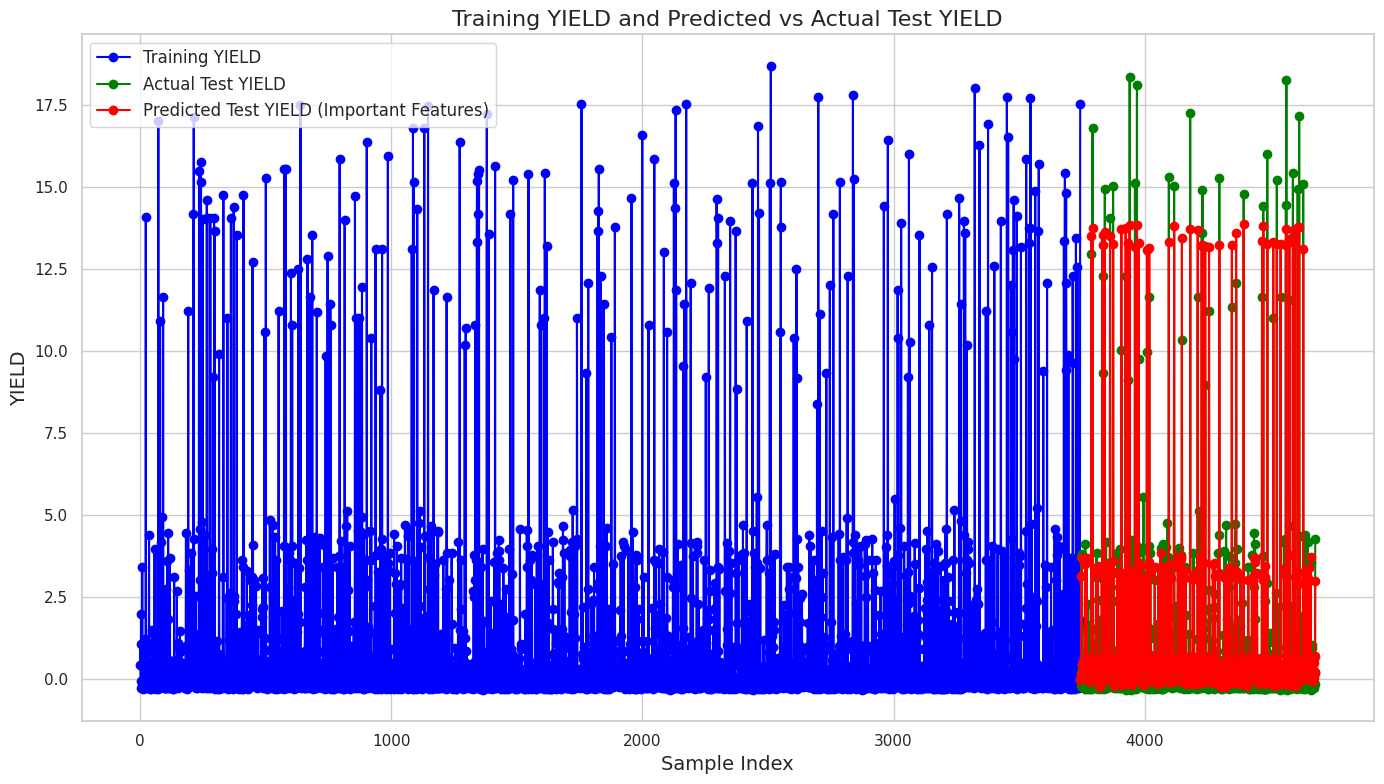

In [ ]:
def pls_regression_auto_components_encoded(df, target_column, climate_columns_with_commodity, threshold=0.8, test_size=0.2):
    """
    Apply Partial Least Squares (PLS) Regression to deal with multicollinearity,
    using climate variables and encoded commodity columns. Automatically
    determine the number of PLS components to reach a specified R^2 threshold on the training set.

    Parameters:
    - df: DataFrame containing the data.
    - target_column: The name of the target variable column.
    - climate_columns_with_commodity: List of columns to be used as predictors.
    - threshold: The desired R^2 score threshold for the training set.
    - test_size: The proportion of the dataset to include in the test split.

    Returns:
    - pls_model: The fitted PLS model.
    - X_test: The test predictors.
    - y_test: The actual test target values.
    - y_pred: The predicted test target values.
    - model_metrics: A dictionary containing MSE and R^2 score.
    - loadings_df: A DataFrame containing the loadings for each predictor variable for the latent component with the highest coefficient.
    - pls_model_important: The fitted PLS model with important features.
    - y_pred_important_test: Predictions for the test set using important features.
    - model_metrics_important: Model metrics for the important features.
    """

    # Define X and y
    X = df[climate_columns_with_commodity]
    y = df[target_column]

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

    # Determine the optimal number of components
    max_components = min(len(X_train), len(climate_columns_with_commodity))
    best_n_components = None
    best_r2 = -float('inf')
    for n_components in range(1, max_components + 1):
        pls_model = PLSRegression(n_components=n_components)
        pls_model.fit(X_train, y_train)
        y_train_pred = pls_model.predict(X_train)
        train_r2 = r2_score(y_train, y_train_pred)
        if train_r2 >= threshold:
            if train_r2 > best_r2:
                best_r2 = train_r2
                best_n_components = n_components
            print(f"Optimal number of components: {n_components}")
            break
    else:
        # If no n_components reach the threshold, use the maximum possible components
        best_n_components = max_components
        print(f"No optimal number of components found. Using the maximum number of components: {best_n_components}")

    # Apply PLS Regression with the determined number of components
    pls_model = PLSRegression(n_components=best_n_components)
    pls_model.fit(X_train, y_train)

    # Predict on the training and test sets
    y_train_pred = pls_model.predict(X_train)
    y_pred = pls_model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    model_metrics = {'MSE': mse, 'R^2': r2}

    # Find the latent component with the highest absolute coefficient value
    component_coefficients = pls_model.coef_.flatten()
    max_coeff_idx = abs(component_coefficients).argmax()

    # Ensure index is within bounds
    if max_coeff_idx >= pls_model.x_loadings_.shape[1]:
        max_coeff_idx = pls_model.x_loadings_.shape[1] - 1

    # Extract the loadings for the component with the highest coefficient
    loadings = pls_model.x_loadings_[:, max_coeff_idx]  # Loadings for the selected component

    # Create a DataFrame with variable names and their corresponding loadings
    loadings_df = pd.DataFrame({
        'Variable': climate_columns_with_commodity,
        'Loading': loadings
    })

    # Sort the DataFrame by the absolute value of the loadings in descending order
    loadings_df = loadings_df.sort_values(by='Loading', key=abs, ascending=False)

    # Print the final formula in the latent space
    coef = component_coefficients  # Coefficients for the latent components
    print(f'PLS Regression Formula for {target_column} in Latent Space:')
    formula_terms = " + ".join(f"{coef[i]:+.4f} * Latent_{i+1}" for i in range(len(coef)))
    print(f"{target_column} = {formula_terms}")

    # Print loadings for the latent component with the highest coefficient
    print("\nLoadings for the Latent Component with the Highest Absolute Coefficient:")
    print(loadings_df)

    print(f'Model Metrics: {model_metrics}')

    # Extract the top N important features (for example, top 10 features)
    top_features = loadings_df.head(10)['Variable'].values
    print(f"Top features: {top_features}")

    # Create a new DataFrame with only the top features
    X_important_train = X_train[top_features]
    X_important_test = X_test[top_features]

    # Train a new PLS model with the important features
    pls_model_important = PLSRegression(n_components=min(best_n_components, len(top_features), X_important_train.shape[1]))
    pls_model_important.fit(X_important_train, y_train)

    # Predict with the important features
    y_pred_important_test = pls_model_important.predict(X_important_test)

    # Evaluate the new model
    mse_important = mean_squared_error(y_test, y_pred_important_test)
    r2_important = r2_score(y_test, y_pred_important_test)

    model_metrics_important = {'MSE': mse_important, 'R^2': r2_important}

    print(f'\nModel Metrics with Important Features: {model_metrics_important}')

    # Plot the training set yield and the prediction vs actual for the test set
    plt.figure(figsize=(14, 8))
    sns.set_style("whitegrid")

    # Plot training set yield
    plt.plot(range(len(y_train)), y_train, 'o-', label='Training YIELD', color='blue')

    # Plot the actual and predicted values for the test set
    plt.plot(range(len(y_train), len(y_train) + len(y_test)), y_test, 'o-', label='Actual Test YIELD', color='green')
    plt.plot(range(len(y_train), len(y_train) + len(y_test)), y_pred_important_test, 'o-', label='Predicted Test YIELD (Important Features)', color='red')

    plt.xlabel("Sample Index", fontsize=14)
    plt.ylabel("YIELD", fontsize=14)
    plt.title(f"Training YIELD and Predicted vs Actual Test YIELD", fontsize=16)
    plt.legend(fontsize=12)
    plt.grid(True)
    plt.tight_layout()

    plt.show()

    return pls_model, X_test, y_test, y_pred, model_metrics, loadings_df, pls_model_important, y_pred_important_test, model_metrics_important


pls_model, X_test, y_test, y_pred, model_metrics, loadings_df, pls_model_important, y_pred_important_test, model_metrics_important = pls_regression_auto_components_encoded(
    agri_climate_df_encode,
    target_column='YIELD',
    climate_columns_with_commodity=climate_columns_with_commodity,  # specify as keyword argument
    threshold=0.8,
    test_size=0.2)

# 7. Lasso Regression
- When features are highly correlated, Lasso tends to select one feature from a group of correlated features and set the coefficients of the others to zero. This mechanism helps in selecting the most relevant features and ignoring those that provide redundant information due to multicollinearity. Essentially, Lasso performs feature selection as part of the regularization process.
- Larger 𝛼 values increase the sparsity of the model by forcing more coefficients to zero, effectively selecting a smaller subset of features.
- Smaller 𝛼 values retain more features, which may not fully address multicollinearity if many features are still highly correlated.
Selecting the optimal 𝛼 value in Lasso Regression to address multicollinearity effectively is a nuanced process.
- The goal is to choose an 𝛼 that balances the reduction of multicollinearity with retaining a meaningful subset of features.
- To effectively choose an 𝛼 value that balances the reduction of multicollinearity and retaining a meaningful subset of features, you should incorporate cross-validation to determine the best 𝛼.


## 7.1 Lasso Regression on agri_climate_df.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0002035356873073546, tolerance: 0.00012408173588417505
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00036475107781186455, tolerance: 0.00012408173588417505
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00040892809635934, tolerance: 0.00012408173588417505
  model = cd_fast.enet_coordinate_descent_gram(


Optimal Alpha: 8.603858766443886e-06

Coefficients:
                                                    Coefficient
January-December Maximum Temperature (Units Deg...    -0.149868
Ts                                                    -0.138699
January-December Heating Degree Days (Units Fah...    -0.116743
Gwetprof                                              -0.091395
T2Mdew                                                 0.057823
Gwetroot                                               0.056873
Gwettop                                                0.052636
Rh2M                                                  -0.048346
January-December Minimum Temperature (Units Deg...     0.041089
T2Mwet                                                 0.036090
Qv2M                                                  -0.033990
Ps                                                     0.028470
Cloud_Amt                                             -0.025415
January-December Cooling Degree Days (Units Fah...  

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.332e-01, tolerance: 1.562e-04
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.591e-01, tolerance: 1.562e-04
  model = cd_fast.enet_coordinate_descent(


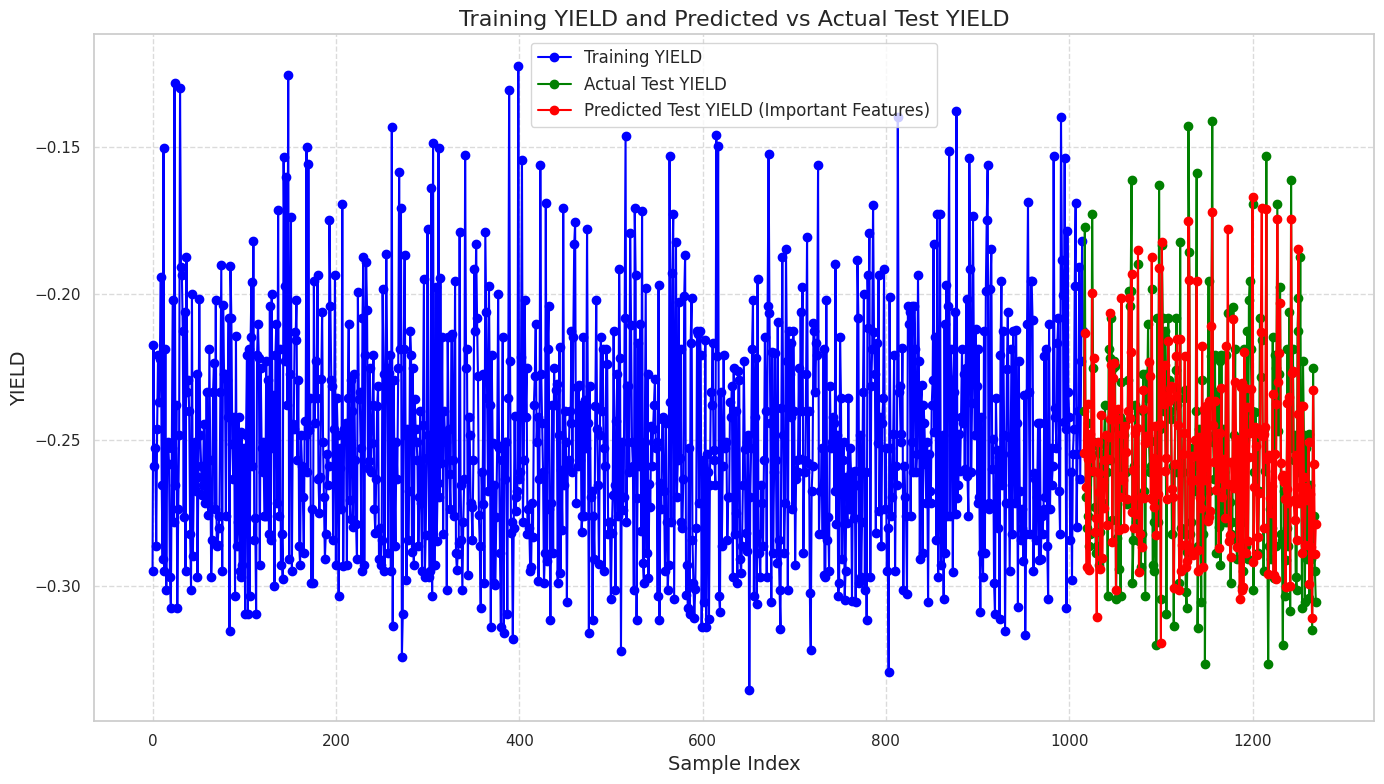

In [ ]:
def lasso_regression(df, commodity, target_column, test_size, random_state=42, top_n_features=15):
    """
    Apply Lasso Regression to predict the target variable using climate variables and a specified commodity type.
    Use cross-validation to select the optimal alpha that balances the reduction of multicollinearity with retaining a meaningful subset of features.

    Parameters:
    - df: DataFrame containing the data.
    - commodity: The name of the commodity to filter the data.
    - target_column: The name of the target variable column.
    - test_size: The proportion of the dataset to include in the test split.
    - random_state: Controls the randomness of the estimator.
    - top_n_features: Number of top features to retain based on absolute coefficient values.

    Returns:
    - lasso_model: The fitted Lasso model.
    - X_test: The test predictors.
    - y_test: The actual test target values.
    - y_pred: The predicted test target values.
    - model_metrics: A dictionary containing MSE and R^2 score.
    - coefficients: A DataFrame containing the coefficients for each predictor variable.
    - lasso_model_important: The fitted Lasso model with important features.
    - y_pred_important_test: Predictions for the test set using important features.
    - model_metrics_important: Model metrics for the important features.
    """

    # Filter the DataFrame based on the specified commodity
    df_filtered = df[df['Commodity'] == commodity]

    if df_filtered.empty or len(df_filtered) < 2:
        raise ValueError(f"Not enough samples for commodity '{commodity}' to perform train-test split.")

    # Define X and y
    X = df_filtered[climate_columns_without_commodity]
    y = df_filtered[target_column]

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Perform Lasso Regression with cross-validation to find the optimal alpha
    lasso_cv = LassoCV(alphas=None, cv=5, max_iter=10000, random_state=random_state)
    lasso_cv.fit(X_train, y_train)

    # Get the optimal alpha
    optimal_alpha = lasso_cv.alpha_
    print(f'Optimal Alpha: {optimal_alpha}')

    # Apply Lasso Regression with the optimal alpha
    lasso_model = Lasso(alpha=optimal_alpha, random_state=random_state)
    lasso_model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = lasso_model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    model_metrics = {'MSE': mse, 'R^2': r2}

    # Extract coefficients and sort by absolute value
    coefficients = pd.DataFrame(lasso_model.coef_, index=climate_columns_without_commodity, columns=['Coefficient'])
    coefficients['AbsCoefficient'] = coefficients['Coefficient'].abs()
    coefficients = coefficients.sort_values(by='AbsCoefficient', ascending=False).drop(columns=['AbsCoefficient'])

    # Print coefficients
    print(f'\nCoefficients:\n{coefficients}')

    # Print model metrics
    print(f'\nModel Metrics: {model_metrics}')

    # Extract the top N important features
    top_features = coefficients.head(top_n_features).index
    print(f"\nTop {top_n_features} features: {top_features.tolist()}")

    # Create a new DataFrame with only the top features
    X_important_train = X_train[top_features]
    X_important_test = X_test[top_features]

    # Train a new Lasso model with the important features
    lasso_model_important = Lasso(alpha=optimal_alpha, random_state=random_state)
    lasso_model_important.fit(X_important_train, y_train)

    # Predict with the important features
    y_pred_important_test = lasso_model_important.predict(X_important_test)

    # Evaluate the new model
    mse_important = mean_squared_error(y_test, y_pred_important_test)
    r2_important = r2_score(y_test, y_pred_important_test)

    model_metrics_important = {'MSE': mse_important, 'R^2': r2_important}

    print(f'\nModel Metrics with Important Features: {model_metrics_important}')

    # Plot the training set yield and the prediction vs actual for the test set
    plt.figure(figsize=(14, 8))
    sns.set_style("whitegrid")

    # Plot training set yield
    plt.plot(range(len(y_train)), y_train, 'o-', label='Training YIELD', color='blue')

    # Plot the actual and predicted values for the test set
    plt.plot(range(len(y_train), len(y_train) + len(y_test)), y_test, 'o-', label='Actual Test YIELD', color='green')
    plt.plot(range(len(y_train), len(y_train) + len(y_test)), y_pred_important_test, 'o-', label='Predicted Test YIELD (Important Features)', color='red')



    plt.xlabel("Sample Index", fontsize=14)
    plt.ylabel("YIELD", fontsize=14)
    plt.title(f"Training YIELD and Predicted vs Actual Test YIELD", fontsize=16)
    plt.legend(fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()

    plt.show()

    return lasso_model, X_test, y_test, y_pred, model_metrics, coefficients, lasso_model_important, y_pred_important_test, model_metrics_important

# Example usage
lasso_model, X_test, y_test, y_pred, model_metrics, coefficients, lasso_model_important, y_pred_important_test, model_metrics_important = lasso_regression(
    agri_climate_df,
    'WHEAT',
    'YIELD',
    test_size=0.2
)


## 7.2 Lasso Regression on agri_climate_df_encode.

Optimal Alpha: 0.0006224070360680254

Coefficients:
                                                    Coefficient
Commodity_RICE                                        12.650776
Commodity_BEANS                                        2.578334
Commodity_WHEAT                                       -0.946316
Commodity_CORN                                        -0.751575
Commodity_COTTON                                       0.693894
Gwettop                                               -0.563754
Gwetroot                                               0.503491
January-December Heating Degree Days (Units Fah...    -0.408015
Commodity_POTATOES                                    -0.407980
Toa_Sw_Dwn                                            -0.352483
Cloud_Amt                                             -0.338440
Qv2M                                                   0.309553
January-December Maximum Temperature (Units Deg...    -0.288917
Ws2M                                                

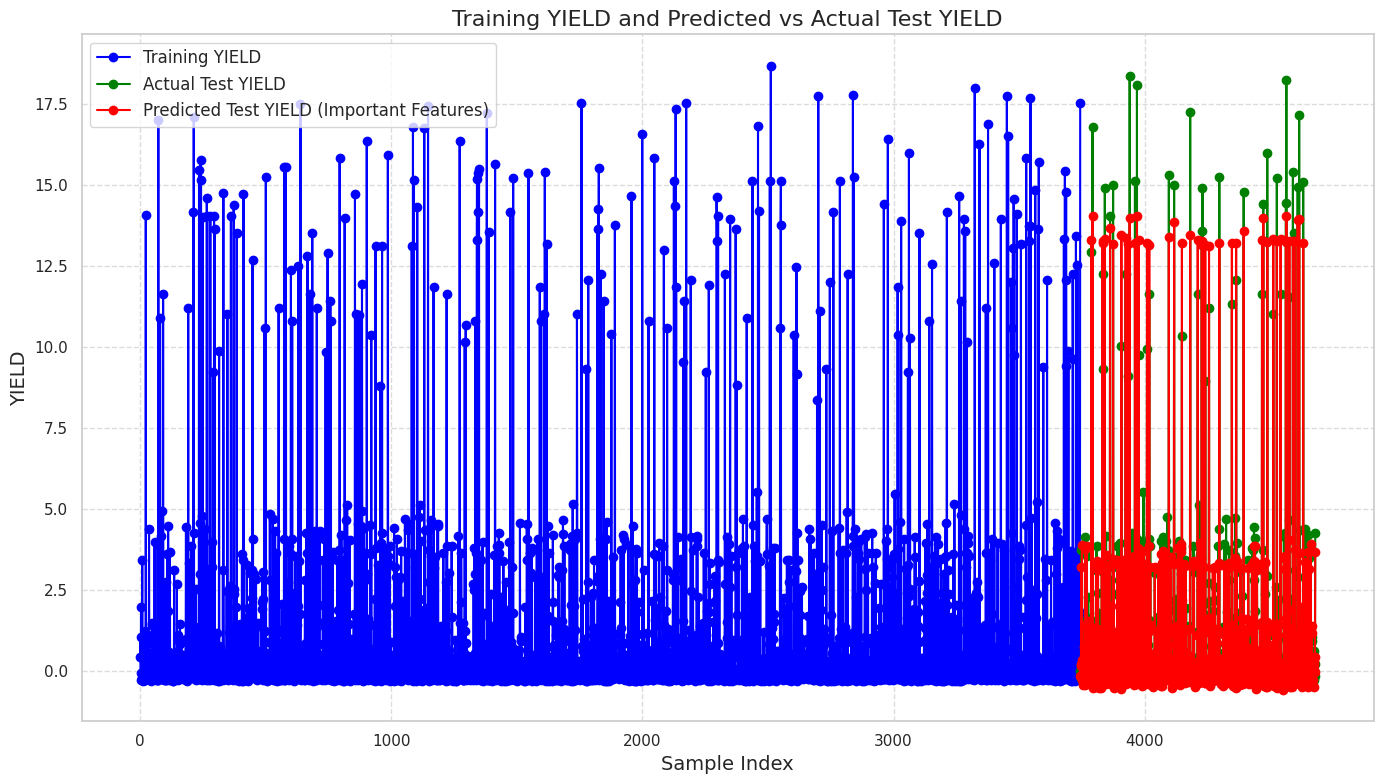

In [ ]:
def lasso_regression_encoded(df, target_column, test_size, random_state=42, top_n_features=10):
    """
    Apply Lasso Regression with cross-validation to predict the target variable using encoded climate variables.
    This function selects the best alpha that balances the reduction of multicollinearity with retaining a meaningful subset of features.

    Parameters:
    - df: DataFrame containing the data.
    - target_column: The name of the target variable column.
    - test_size: The proportion of the dataset to include in the test split.
    - random_state: Controls the randomness of the estimator.
    - top_n_features: Number of top features to retain based on absolute coefficient values.

    Returns:
    - lasso_model: The fitted Lasso model with the optimal alpha.
    - X_test: The test predictors.
    - y_test: The actual test target values.
    - y_pred: The predicted test target values.
    - model_metrics: A dictionary containing MSE and R^2 score.
    - coefficients: A DataFrame containing the coefficients for each predictor variable.
    - lasso_model_important: The fitted Lasso model with important features.
    - y_pred_important_test: Predictions for the test set using important features.
    - model_metrics_important: Model metrics for the important features.
    """

    # Define X and y
    X = df[climate_columns_with_commodity]
    y = df[target_column]

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Perform Lasso Regression with cross-validation to find the optimal alpha
    lasso_cv = LassoCV(alphas=None, cv=5, max_iter=10000, random_state=random_state)
    lasso_cv.fit(X_train, y_train)

    # Get the optimal alpha
    optimal_alpha = lasso_cv.alpha_
    print(f'Optimal Alpha: {optimal_alpha}')

    # Apply Lasso Regression with the optimal alpha
    lasso_model = Lasso(alpha=optimal_alpha, random_state=random_state)
    lasso_model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = lasso_model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    model_metrics = {'MSE': mse, 'R^2': r2}

    # Extract coefficients and sort by absolute value
    coefficients = pd.DataFrame(lasso_model.coef_, index=climate_columns_with_commodity, columns=['Coefficient'])
    coefficients['AbsCoefficient'] = coefficients['Coefficient'].abs()
    coefficients = coefficients.sort_values(by='AbsCoefficient', ascending=False).drop(columns=['AbsCoefficient'])

    # Print coefficients
    print(f'\nCoefficients:\n{coefficients}')

    # Print model metrics
    print(f'\nModel Metrics: {model_metrics}')

    # Extract the top N important features
    top_features = coefficients.head(top_n_features).index
    print(f"\nTop {top_n_features} features: {top_features.tolist()}")

    # Create a new DataFrame with only the top features
    X_important_train = X_train[top_features]
    X_important_test = X_test[top_features]

    # Train a new Lasso model with the important features
    lasso_model_important = Lasso(alpha=optimal_alpha, random_state=random_state)
    lasso_model_important.fit(X_important_train, y_train)

    # Predict with the important features
    y_pred_important_test = lasso_model_important.predict(X_important_test)

    # Evaluate the new model
    mse_important = mean_squared_error(y_test, y_pred_important_test)
    r2_important = r2_score(y_test, y_pred_important_test)

    model_metrics_important = {'MSE': mse_important, 'R^2': r2_important}

    print(f'\nModel Metrics with Important Features: {model_metrics_important}')

    # Plot the training set yield and the prediction vs actual for the test set
    plt.figure(figsize=(14, 8))
    sns.set_style("whitegrid")

    # Plot training set yield
    plt.plot(range(len(y_train)), y_train, 'o-', label='Training YIELD', color='blue')

    # Plot the actual and predicted values for the test set
    plt.plot(range(len(y_train), len(y_train) + len(y_test)), y_test, 'o-', label='Actual Test YIELD', color='green')
    plt.plot(range(len(y_train), len(y_train) + len(y_test)), y_pred_important_test, 'o-', label='Predicted Test YIELD (Important Features)', color='red')

    plt.xlabel("Sample Index", fontsize=14)
    plt.ylabel("YIELD", fontsize=14)
    plt.title(f"Training YIELD and Predicted vs Actual Test YIELD", fontsize=16)
    plt.legend(fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()

    plt.show()

    return lasso_model, X_test, y_test, y_pred, model_metrics, coefficients, lasso_model_important, y_pred_important_test, model_metrics_important

# Example usage
lasso_model, X_test, y_test, y_pred, model_metrics, coefficients, lasso_model_important, y_pred_important_test, model_metrics_important = lasso_regression_encoded(
    agri_climate_df_encode,
    target_column='YIELD',
    test_size=0.2
)

# 8. Elastic Net Regression
 a powerful and flexible regression technique that combines the strengths of both Lasso and Ridge regression.

Combining Lasso and Ridge Penalties
- Lasso Regression (L1 Penalty):
Feature Selection: Lasso regression adds an L1 penalty (absolute value of the coefficients) to the loss function. This encourages sparsity in the coefficient estimates, effectively setting some coefficients to zero and performing feature selection.
Multicollinearity Handling: Lasso can help with multicollinearity to some extent by shrinking coefficients, but it may arbitrarily select one feature from a group of highly correlated features and ignore others.

- Ridge Regression (L2 Penalty):
Shrinkage: Ridge regression adds an L2 penalty (squared value of the coefficients) to the loss function. This shrinks the coefficients of correlated features towards zero but doesn’t set them exactly to zero. It’s better at handling multicollinearity because it retains all features but with smaller coefficients.
Handling Multicollinearity: Ridge regression helps when features are highly correlated by distributing the coefficients among them, reducing the variance of the predictions.

- Elastic Net Regression:
Combination of Penalties: Elastic Net combines both L1 and L2 penalties, which allows it to benefit from both feature selection and shrinkage. The L1 penalty can zero out some coefficients (feature selection), while the L2 penalty can handle multicollinearity by shrinking the coefficients of correlated features.

## 8.1 Elastic Net Regression on agri_climate_df.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00021371052877011687, tolerance: 0.00012408173588417505
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00013498271234024806, tolerance: 0.00012408173588417505
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0003311731117650041, tolerance: 0.00012408173588417505
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_d

Optimal Alpha: 9.559843073826533e-06
Optimal L1 Ratio: 0.9

Coefficients:
                                                    Coefficient
January-December Maximum Temperature (Units Deg...    -0.149756
Ts                                                    -0.138523
January-December Heating Degree Days (Units Fah...    -0.116691
Gwetprof                                              -0.091363
T2Mdew                                                 0.057640
Gwetroot                                               0.056849
Gwettop                                                0.052619
Rh2M                                                  -0.048235
January-December Minimum Temperature (Units Deg...     0.041066
T2Mwet                                                 0.036097
Qv2M                                                  -0.034031
Ps                                                     0.028465
Cloud_Amt                                             -0.025417
January-December Cooling Degre

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.330e-01, tolerance: 1.562e-04
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.591e-01, tolerance: 1.562e-04
  model = cd_fast.enet_coordinate_descent(


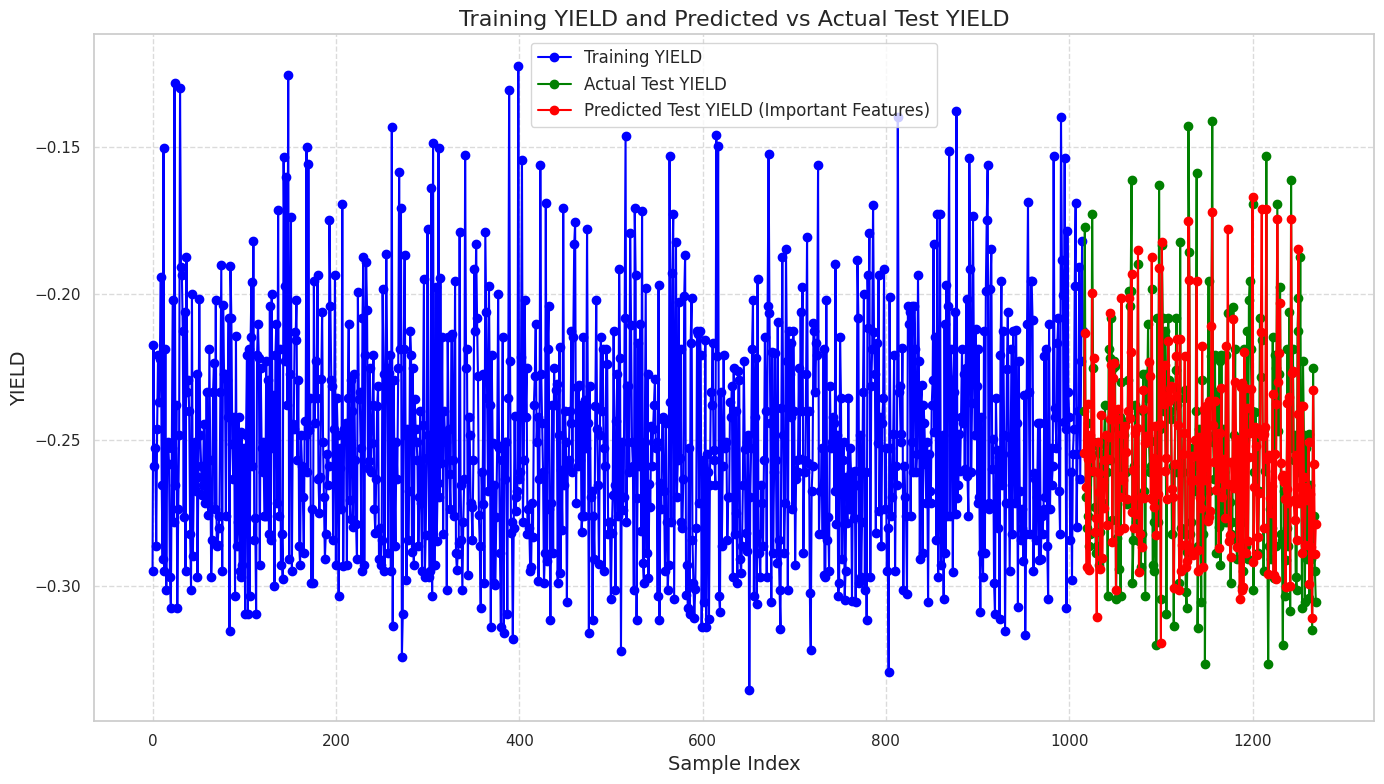

In [ ]:
def elastic_net_regression(df, commodity, target_column, test_size, random_state=42, top_n_features=15):
    """
    Apply Elastic Net Regression to predict the target variable using climate variables and a specified commodity type.
    Use cross-validation to select the optimal alpha and l1_ratio that balances the reduction of multicollinearity
    with retaining a meaningful subset of features.

    Parameters:
    - df: DataFrame containing the data.
    - commodity: The name of the commodity to filter the data.
    - target_column: The name of the target variable column.
    - test_size: The proportion of the dataset to include in the test split.
    - random_state: Controls the randomness of the estimator.
    - top_n_features: Number of top features to retain based on absolute coefficient values.

    Returns:
    - elastic_net_model: The fitted Elastic Net model with the optimal alpha and l1_ratio.
    - X_test: The test predictors.
    - y_test: The actual test target values.
    - y_pred: The predicted test target values.
    - model_metrics: A dictionary containing MSE and R^2 score.
    - coefficients: A DataFrame containing the coefficients for each predictor variable.
    - elastic_net_model_important: The fitted Elastic Net model with important features.
    - y_pred_important_test: Predictions for the test set using important features.
    - model_metrics_important: Model metrics for the important features.
    """

    # Filter the DataFrame based on the specified commodity
    df_filtered = df[df['Commodity'] == commodity]

    if df_filtered.empty or len(df_filtered) < 2:
        raise ValueError(f"Not enough samples for commodity '{commodity}' to perform train-test split.")

    # Define X and y
    X = df_filtered[climate_columns_without_commodity]
    y = df_filtered[target_column]

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Perform Elastic Net Regression with cross-validation to find the optimal alpha and l1_ratio
    elastic_net_cv = ElasticNetCV(alphas=None, l1_ratio=[0.1, 0.5, 0.9], cv=5, max_iter=10000, random_state=random_state)
    elastic_net_cv.fit(X_train, y_train)

    # Get the optimal alpha and l1_ratio
    optimal_alpha = elastic_net_cv.alpha_
    optimal_l1_ratio = elastic_net_cv.l1_ratio_
    print(f'Optimal Alpha: {optimal_alpha}')
    print(f'Optimal L1 Ratio: {optimal_l1_ratio}')

    # Apply Elastic Net Regression with the optimal alpha and l1_ratio
    elastic_net_model = ElasticNet(alpha=optimal_alpha, l1_ratio=optimal_l1_ratio, random_state=random_state)
    elastic_net_model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = elastic_net_model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    model_metrics = {'MSE': mse, 'R^2': r2}

    # Extract coefficients and sort by absolute value
    coefficients = pd.DataFrame(elastic_net_model.coef_, index=climate_columns_without_commodity, columns=['Coefficient'])
    coefficients['AbsCoefficient'] = coefficients['Coefficient'].abs()
    coefficients = coefficients.sort_values(by='AbsCoefficient', ascending=False).drop(columns=['AbsCoefficient'])

    # Print coefficients
    print(f'\nCoefficients:\n{coefficients}')

    # Print model metrics
    print(f'\nModel Metrics: {model_metrics}')

    # Extract the top N important features
    top_features = coefficients.head(top_n_features).index
    print(f"\nTop {top_n_features} features: {top_features.tolist()}")

    # Create a new DataFrame with only the top features
    X_important_train = X_train[top_features]
    X_important_test = X_test[top_features]

    # Train a new Elastic Net model with the important features
    elastic_net_model_important = ElasticNet(alpha=optimal_alpha, l1_ratio=optimal_l1_ratio, random_state=random_state)
    elastic_net_model_important.fit(X_important_train, y_train)

    # Predict with the important features
    y_pred_important_test = elastic_net_model_important.predict(X_important_test)

    # Evaluate the new model
    mse_important = mean_squared_error(y_test, y_pred_important_test)
    r2_important = r2_score(y_test, y_pred_important_test)

    model_metrics_important = {'MSE': mse_important, 'R^2': r2_important}

    print(f'\nModel Metrics with Important Features: {model_metrics_important}')

    # Plot the training set yield and the prediction vs actual for the test set
    plt.figure(figsize=(14, 8))
    sns.set_style("whitegrid")

    # Plot training set yield
    plt.plot(range(len(y_train)), y_train, 'o-', label='Training YIELD', color='blue')

    # Plot the actual and predicted values for the test set
    plt.plot(range(len(y_train), len(y_train) + len(y_test)), y_test, 'o-', label='Actual Test YIELD', color='green')
    plt.plot(range(len(y_train), len(y_train) + len(y_test)), y_pred_important_test, 'o-', label='Predicted Test YIELD (Important Features)', color='red')

    plt.xlabel("Sample Index", fontsize=14)
    plt.ylabel("YIELD", fontsize=14)
    plt.title(f"Training YIELD and Predicted vs Actual Test YIELD", fontsize=16)
    plt.legend(fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()

    plt.show()

    return elastic_net_model, X_test, y_test, y_pred, model_metrics, coefficients, elastic_net_model_important, y_pred_important_test, model_metrics_important

# Example usage
elastic_net_model, X_test, y_test, y_pred, model_metrics, coefficients, elastic_net_model_important, y_pred_important_test, model_metrics_important = elastic_net_regression(
    agri_climate_df,
    'WHEAT',
    'YIELD',
    test_size=0.2
)



## 8.2 Elastic Net Regression on agri_climate_df_encode.

Optimal Alpha: 0.0006915633734089173
Optimal L1 Ratio: 0.9

Coefficients:
                                                    Coefficient
Commodity_RICE                                        12.038914
Commodity_BEANS                                        1.983726
Commodity_WHEAT                                       -1.540239
Commodity_CORN                                        -1.345316
Commodity_POTATOES                                    -1.001701
Gwettop                                               -0.538447
Commodity_TOMATOES                                    -0.502022
Gwetroot                                               0.475510
January-December Heating Degree Days (Units Fah...    -0.401429
Toa_Sw_Dwn                                            -0.346980
Cloud_Amt                                             -0.339160
Qv2M                                                   0.292293
January-December Maximum Temperature (Units Deg...    -0.276379
Ws2M                          

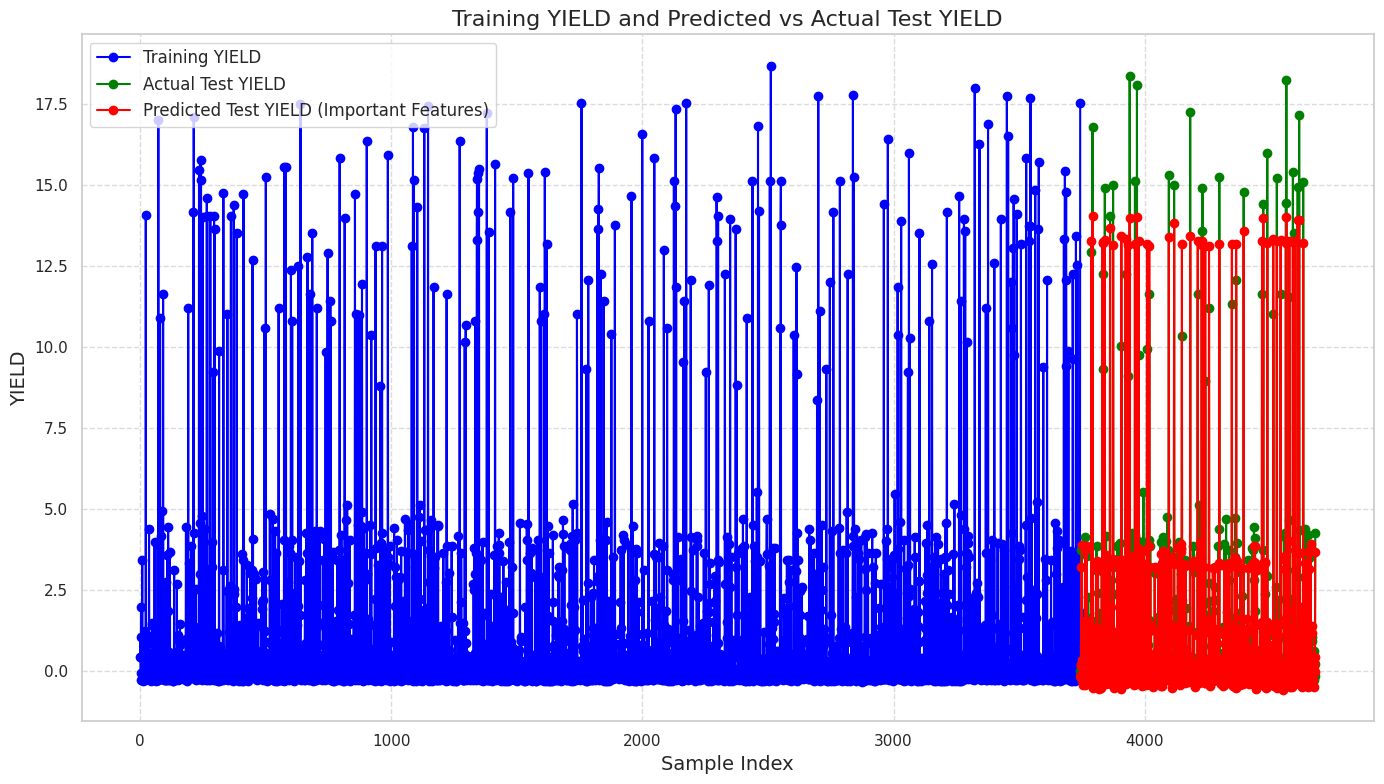

In [ ]:
def elastic_net_regression_encoded(df, target_column, test_size, random_state=42, top_n_features=10):
    """
    Apply Elastic Net Regression with cross-validation to predict the target variable using encoded climate variables.
    This function selects the best alpha and l1_ratio that balances the reduction of multicollinearity with retaining
    a meaningful subset of features.

    Parameters:
    - df: DataFrame containing the data.
    - target_column: The name of the target variable column.
    - test_size: The proportion of the dataset to include in the test split.
    - random_state: Controls the randomness of the estimator.
    - top_n_features: Number of top features to retain based on absolute coefficient values.

    Returns:
    - elastic_net_model: The fitted Elastic Net model with the optimal alpha and l1_ratio.
    - X_test: The test predictors.
    - y_test: The actual test target values.
    - y_pred: The predicted test target values.
    - model_metrics: A dictionary containing MSE and R^2 score.
    - coefficients: A DataFrame containing the coefficients for each predictor variable.
    - elastic_net_model_important: The fitted Elastic Net model with important features.
    - y_pred_important_test: Predictions for the test set using important features.
    - model_metrics_important: Model metrics for the important features.
    """

    # Define X and y
    X = df[climate_columns_with_commodity]
    y = df[target_column]

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Perform Elastic Net Regression with cross-validation to find the optimal alpha and l1_ratio
    elastic_net_cv = ElasticNetCV(alphas=None, l1_ratio=[0.1, 0.5, 0.9], cv=5, max_iter=10000, random_state=random_state)
    elastic_net_cv.fit(X_train, y_train)

    # Get the optimal alpha and l1_ratio
    optimal_alpha = elastic_net_cv.alpha_
    optimal_l1_ratio = elastic_net_cv.l1_ratio_
    print(f'Optimal Alpha: {optimal_alpha}')
    print(f'Optimal L1 Ratio: {optimal_l1_ratio}')

    # Apply Elastic Net Regression with the optimal alpha and l1_ratio
    elastic_net_model = ElasticNet(alpha=optimal_alpha, l1_ratio=optimal_l1_ratio, random_state=random_state)
    elastic_net_model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = elastic_net_model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    model_metrics = {'MSE': mse, 'R^2': r2}

    # Extract coefficients and sort by absolute value
    coefficients = pd.DataFrame(elastic_net_model.coef_, index=X.columns, columns=['Coefficient'])
    coefficients['AbsCoefficient'] = coefficients['Coefficient'].abs()
    coefficients = coefficients.sort_values(by='AbsCoefficient', ascending=False).drop(columns=['AbsCoefficient'])

    # Print coefficients
    print(f'\nCoefficients:\n{coefficients}')

    # Print model metrics
    print(f'\nModel Metrics: {model_metrics}')

    # Extract the top N important features
    top_features = coefficients.head(top_n_features).index
    print(f"\nTop {top_n_features} features: {top_features.tolist()}")

    # Create a new DataFrame with only the top features
    X_important_train = X_train[top_features]
    X_important_test = X_test[top_features]

    # Train a new Elastic Net model with the important features
    elastic_net_model_important = ElasticNet(alpha=optimal_alpha, l1_ratio=optimal_l1_ratio, random_state=random_state)
    elastic_net_model_important.fit(X_important_train, y_train)

    # Predict with the important features
    y_pred_important_test = elastic_net_model_important.predict(X_important_test)

    # Evaluate the new model
    mse_important = mean_squared_error(y_test, y_pred_important_test)
    r2_important = r2_score(y_test, y_pred_important_test)

    model_metrics_important = {'MSE': mse_important, 'R^2': r2_important}

    print(f'\nModel Metrics with Important Features: {model_metrics_important}')

    # Plot the training set yield and the prediction vs actual for the test set
    plt.figure(figsize=(14, 8))
    sns.set_style("whitegrid")

    # Plot training set yield
    plt.plot(range(len(y_train)), y_train, 'o-', label='Training YIELD', color='blue')

    # Plot the actual and predicted values for the test set
    plt.plot(range(len(y_train), len(y_train) + len(y_test)), y_test, 'o-', label='Actual Test YIELD', color='green')
    plt.plot(range(len(y_train), len(y_train) + len(y_test)), y_pred_important_test, 'o-', label='Predicted Test YIELD (Important Features)', color='red')

    plt.xlabel("Sample Index", fontsize=14)
    plt.ylabel("YIELD", fontsize=14)
    plt.title(f"Training YIELD and Predicted vs Actual Test YIELD", fontsize=16)
    plt.legend(fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()

    plt.show()

    return (elastic_net_model, X_test, y_test, y_pred, model_metrics, coefficients,
            elastic_net_model_important, y_pred_important_test, model_metrics_important)

# Example usage
elastic_net_model, X_test, y_test, y_pred, model_metrics, coefficients, elastic_net_model_important, y_pred_important_test, model_metrics_important = elastic_net_regression_encoded(
    agri_climate_df_encode,
    target_column='YIELD',
    test_size=0.2)



# 9. Ranfom Forest Feature Importance
- Automatic Handling of Correlated Features
Tree-Based Methods: Random Forest, being a tree-based method, is less sensitive to multicollinearity compared to linear models. Trees in the forest split on features in a way that can inherently handle correlated features better than linear methods, which might suffer from inflated variance and unstable coefficients.

## 9.1 Random Forest for agri_climate_df.


Feature Importances:
                                                    Importance
Rh2M                                                  0.229535
Allsky_Sfc_Sw_Dwn                                     0.100486
January-December Heating Degree Days (Units Fah...    0.082968
Cloud_Amt                                             0.068238
Ws2M                                                  0.056135
Ps                                                    0.048726
Ws10M                                                 0.045950
Wd2M                                                  0.045722
Qv2M                                                  0.041696
Toa_Sw_Dwn                                            0.038889
Wd10M                                                 0.031122
Clrsky_Sfc_Sw_Dwn                                     0.026828
January-December Cooling Degree Days (Units Fah...    0.025828
January-December Precipitation (Units Inches)         0.017513
T2Mdew                           

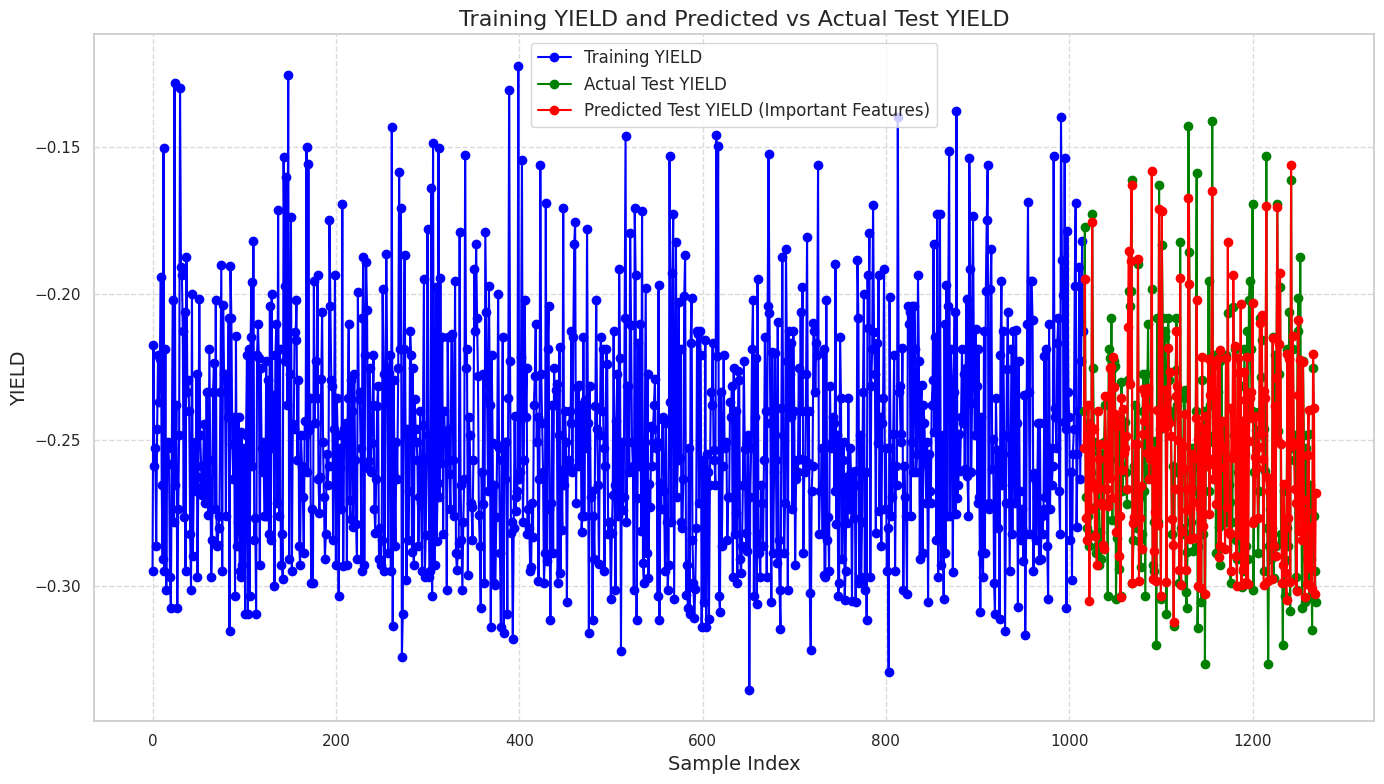

In [ ]:
def random_forest_regression(df, commodity, target_column, test_size=0.2, n_estimators=100, random_state=42, top_n_features=10):
    """
    Apply Random Forest Regression to predict the target variable using climate variables and a specified commodity type.
    Use cross-validation to select the optimal hyperparameters.

    Parameters:
    - df: DataFrame containing the data.
    - commodity: The name of the commodity to filter the data.
    - target_column: The name of the target variable column.
    - test_size: The proportion of the dataset to include in the test split.
    - n_estimators: The number of trees in the forest (default is 100).
    - random_state: Controls the randomness of the estimator.
    - top_n_features: Number of top features to retain based on importance scores.

    Returns:
    - rf_model: The fitted Random Forest model with optimal hyperparameters.
    - X_test: The test predictors.
    - y_test: The actual test target values.
    - y_pred: The predicted test target values.
    - model_metrics: A dictionary containing MSE and R^2 score.
    - feature_importances: A DataFrame containing the feature importances for each predictor variable.
    - rf_model_important: The fitted Random Forest model with important features.
    - y_pred_important_test: Predictions for the test set using important features.
    - model_metrics_important: Model metrics for the important features.
    """

    # Filter the DataFrame based on the specified commodity
    df_filtered = df[df['Commodity'] == commodity]

    if df_filtered.empty or len(df_filtered) < 2:
        raise ValueError(f"Not enough samples for commodity '{commodity}' to perform train-test split.")

    # Define X and y
    X = df_filtered[climate_columns_without_commodity]
    y = df_filtered[target_column]

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Define the parameter grid for GridSearchCV
    param_grid = {
        'n_estimators': [50, 100, 150, 200],  # Number of trees in the forest
        'max_depth': [10, 20, 30, 40] # Maximum depth of the tree
    }

    # Initialize Random Forest Regressor
    rf = RandomForestRegressor(random_state=random_state)

    # Initialize GridSearchCV with cross-validation
    grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train)

    # Get the best model from grid search
    best_rf_model = grid_search.best_estimator_

    # Predict on the test set
    y_pred = best_rf_model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    model_metrics = {'MSE': mse, 'R^2': r2}

    # Extract feature importances and sort by importance
    feature_importances = pd.DataFrame(best_rf_model.feature_importances_, index=X.columns, columns=['Importance'])
    feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

    # Print feature importances
    print(f'\nFeature Importances:\n{feature_importances}')

    # Print model metrics
    print(f'\nModel Metrics: {model_metrics}')

    # Extract the top N important features
    top_features = feature_importances.head(top_n_features).index
    print(f"\nTop {top_n_features} features: {top_features.tolist()}")

    # Create a new DataFrame with only the top features
    X_important_train = X_train[top_features]
    X_important_test = X_test[top_features]

    # Train a new Random Forest model with the important features
    rf_model_important = RandomForestRegressor(n_estimators=n_estimators, random_state=random_state)
    rf_model_important.fit(X_important_train, y_train)

    # Predict with the important features
    y_pred_important_test = rf_model_important.predict(X_important_test)

    # Evaluate the new model
    mse_important = mean_squared_error(y_test, y_pred_important_test)
    r2_important = r2_score(y_test, y_pred_important_test)

    model_metrics_important = {'MSE': mse_important, 'R^2': r2_important}

    print(f'\nModel Metrics with Important Features: {model_metrics_important}')

    # Plot the training set yield and the prediction vs actual for the test set
    plt.figure(figsize=(14, 8))
    sns.set_style("whitegrid")

    # Plot training set yield
    plt.plot(range(len(y_train)), y_train, 'o-', label='Training YIELD', color='blue')

    # Plot the actual and predicted values for the test set
    plt.plot(range(len(y_train), len(y_train) + len(y_test)), y_test, 'o-', label='Actual Test YIELD', color='green')
    plt.plot(range(len(y_train), len(y_train) + len(y_test)), y_pred_important_test, 'o-', label='Predicted Test YIELD (Important Features)', color='red')

    plt.xlabel("Sample Index", fontsize=14)
    plt.ylabel("YIELD", fontsize=14)
    plt.title(f"Training YIELD and Predicted vs Actual Test YIELD", fontsize=16)
    plt.legend(fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()

    plt.show()

    return (best_rf_model, X_test, y_test, y_pred, model_metrics, feature_importances,
            rf_model_important, y_pred_important_test, model_metrics_important)

# Example usage
rf_model, X_test, y_test, y_pred, model_metrics, feature_importances, rf_model_important, y_pred_important_test, model_metrics_important = random_forest_regression(
    agri_climate_df,
    'WHEAT',
    'YIELD',
    test_size=0.2,
    top_n_features=10
)


## 9.2 Random Forest for agri_climate_df_encode.


Feature Importances:
                                                    Importance
Commodity_RICE                                        0.828298
Commodity_BEANS                                       0.103462
Cloud_Amt                                             0.018697
Commodity_COTTON                                      0.017978
T2Mdew                                                0.003413
Commodity_POTATOES                                    0.003302
Clrsky_Sfc_Sw_Dwn                                     0.003129
Wd10M                                                 0.002865
Qv2M                                                  0.002741
Allsky_Srf_Alb                                        0.001447
Ps                                                    0.001392
Allsky_Sfc_Sw_Dwn                                     0.001223
Toa_Sw_Dwn                                            0.001008
January-December Heating Degree Days (Units Fah...    0.000894
Gwettop                          

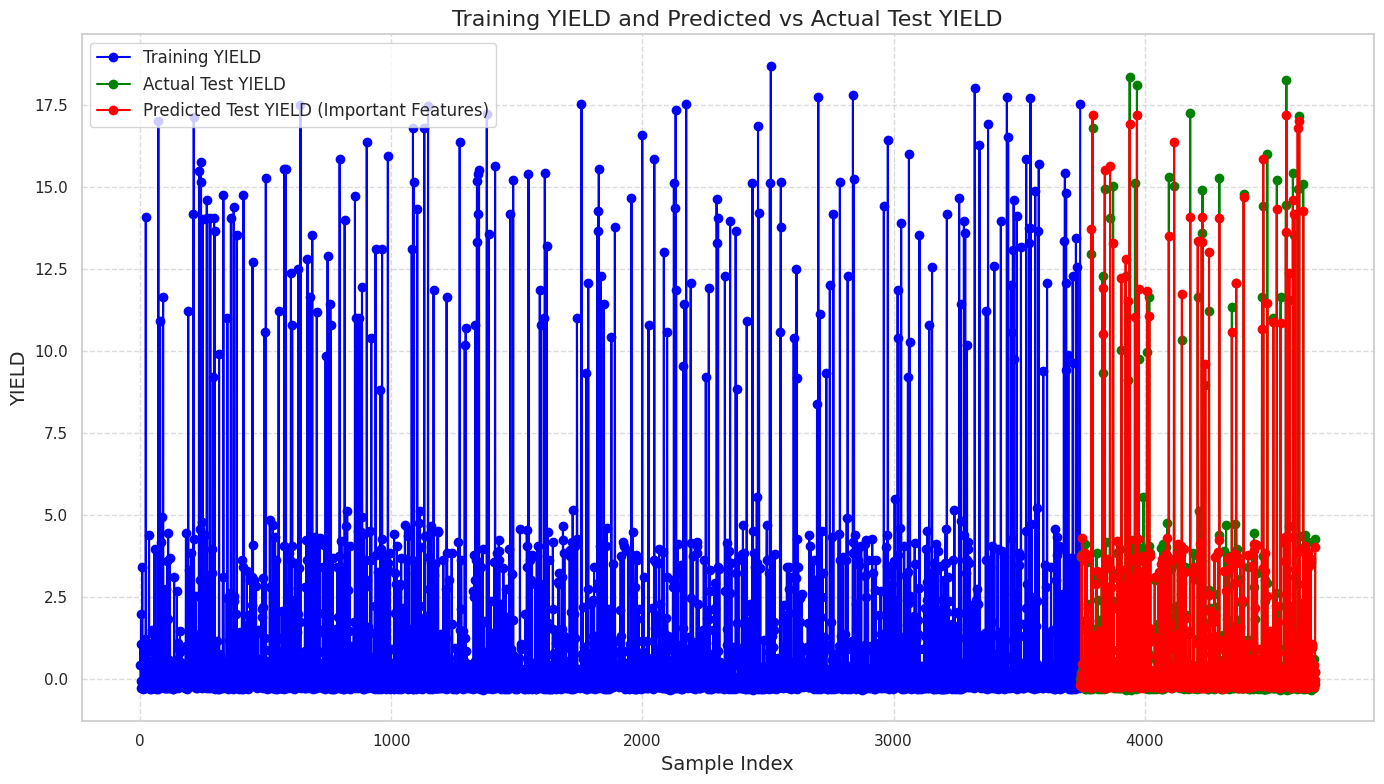

In [ ]:
def random_forest_regression_encoded(df, target_column, test_size=0.2, random_state=42, top_n_features=10):
    """
    Apply Random Forest Regression to predict the target variable using climate variables and encoded commodity columns.
    Use cross-validation to select the optimal hyperparameters, then train and evaluate a new model with the top N important features.

    Parameters:
    - df: DataFrame containing the data.
    - target_column: The name of the target variable column.
    - test_size: The proportion of the dataset to include in the test split.
    - random_state: Controls the randomness of the estimator.
    - top_n_features: Number of top features to retain based on importance scores.

    Returns:
    - rf_model: The fitted Random Forest model with optimal hyperparameters.
    - X_test: The test predictors.
    - y_test: The actual test target values.
    - y_pred: The predicted test target values.
    - model_metrics: A dictionary containing MSE and R^2 score for the full model.
    - feature_importances: A DataFrame containing the feature importances for each predictor variable.
    - rf_model_important: The fitted Random Forest model with important features.
    - y_pred_important_test: Predictions for the test set using important features.
    - model_metrics_important: Model metrics for the important features.
    """

    # Define X and y
    X = df[climate_columns_with_commodity]
    y = df[target_column]

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Define the parameter grid for GridSearchCV
    param_grid = {
        'n_estimators': [50, 100, 150, 200],  # Number of trees in the forest
        'max_depth': [10, 20, 30, 40]         # Maximum depth of the tree
    }

    # Initialize Random Forest Regressor
    rf = RandomForestRegressor(random_state=random_state)

    # Initialize GridSearchCV with cross-validation
    grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train)

    # Get the best model from grid search
    best_rf_model = grid_search.best_estimator_

    # Predict on the test set
    y_pred = best_rf_model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    model_metrics = {'MSE': mse, 'R^2': r2}

    # Extract feature importances and sort by importance
    feature_importances = pd.DataFrame(best_rf_model.feature_importances_, index=X.columns, columns=['Importance'])
    feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

    # Print feature importances
    print(f'\nFeature Importances:\n{feature_importances}')

    # Print model metrics
    print(f'\nModel Metrics: {model_metrics}')

    # Extract the top N important features
    top_features = feature_importances.head(top_n_features).index
    print(f"\nTop {top_n_features} features: {top_features.tolist()}")

    # Create a new DataFrame with only the top features
    X_important_train = X_train[top_features]
    X_important_test = X_test[top_features]

    # Train a new Random Forest model with the important features
    rf_model_important = RandomForestRegressor(n_estimators=100, random_state=random_state)
    rf_model_important.fit(X_important_train, y_train)

    # Predict with the important features
    y_pred_important_test = rf_model_important.predict(X_important_test)

    # Evaluate the new model
    mse_important = mean_squared_error(y_test, y_pred_important_test)
    r2_important = r2_score(y_test, y_pred_important_test)
    model_metrics_important = {'MSE': mse_important, 'R^2': r2_important}

    print(f'\nModel Metrics with Important Features: {model_metrics_important}')

    # Plot the training set yield and the prediction vs actual for the test set
    plt.figure(figsize=(14, 8))
    sns.set_style("whitegrid")

    # Plot training set yield
    plt.plot(range(len(y_train)), y_train, 'o-', label='Training YIELD', color='blue')

    # Plot the actual and predicted values for the test set
    plt.plot(range(len(y_train), len(y_train) + len(y_test)), y_test, 'o-', label='Actual Test YIELD', color='green')
    plt.plot(range(len(y_train), len(y_train) + len(y_test)), y_pred_important_test, 'o-', label='Predicted Test YIELD (Important Features)', color='red')

    plt.xlabel("Sample Index", fontsize=14)
    plt.ylabel("YIELD", fontsize=14)
    plt.title("Training YIELD and Predicted vs Actual Test YIELD", fontsize=16)
    plt.legend(fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

    return (best_rf_model, X_test, y_test, y_pred, model_metrics, feature_importances,
            rf_model_important, y_pred_important_test, model_metrics_important)

# Example usage
rf_model, X_test, y_test, y_pred, model_metrics, feature_importances, rf_model_important, y_pred_important_test, model_metrics_important = random_forest_regression_encoded(
    agri_climate_df_encode,
    target_column='YIELD',
    test_size=0.2,
    top_n_features=10
)

# 10. XG Boost
- Trees inherently handle multicollinearity because they split on features that provide the most information gain at each step. If multiple features are correlated, XGBoost can select the most informative feature for splitting and ignore less informative ones.
- By aggregating the results from multiple trees, XGBoost evaluates feature importance based on how frequently and effectively features are used for splits across all trees. This approach naturally down-weights the importance of highly correlated features.
- Utilizes gradient boosting, which builds trees sequentially. Each new tree corrects errors made by the previous trees. This iterative refinement typically leads to better performance and more accurate predictions.

## 10.1 XG Boost on agri_climate_df.


Feature Importances:
                                                    Importance
Rh2M                                                  0.308133
January-December Heating Degree Days (Units Fah...    0.125346
Toa_Sw_Dwn                                            0.077087
Ws10M                                                 0.066040
Wd2M                                                  0.058507
Cloud_Amt                                             0.046189
Ws2M                                                  0.045193
Ps                                                    0.042367
Allsky_Sfc_Sw_Dwn                                     0.041398
Gwetroot                                              0.022126
January-December Minimum Temperature (Units Deg...    0.021067
Clrsky_Sfc_Sw_Dwn                                     0.019987
Wd10M                                                 0.016485
Qv2M                                                  0.012436
January-December Cooling Degree D

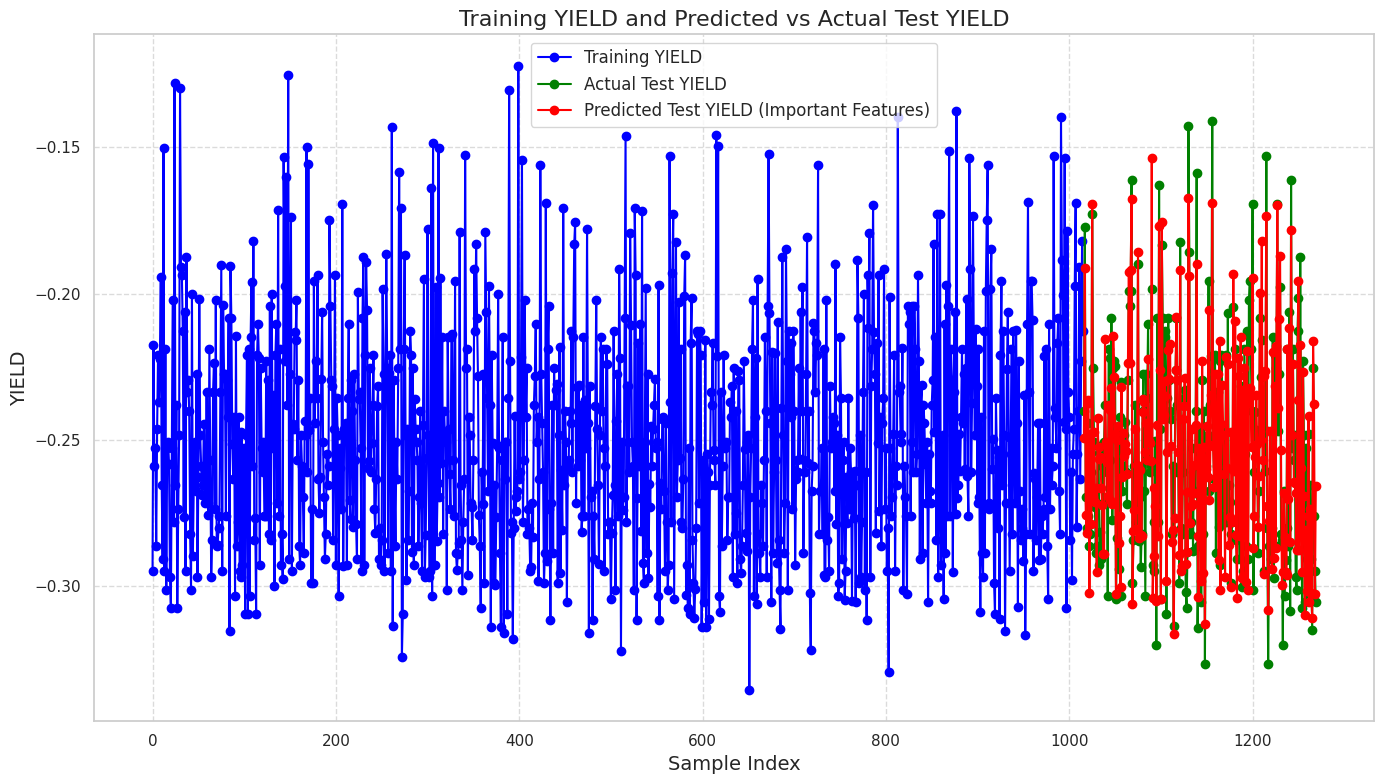

In [ ]:
def xgboost_feature_importance(df, commodity, target_column, test_size=0.2, random_state=42, top_n_features=10):
    """
    Apply XGBoost Regression to predict the target variable and extract feature importances.
    Use XGBoost to evaluate feature importance and select the top features.

    Parameters:
    - df: DataFrame containing the data.
    - commodity: The name of the commodity to filter the data.
    - target_column: The name of the target variable column.
    - test_size: The proportion of the dataset to include in the test split.
    - random_state: Controls the randomness of the estimator.
    - top_n_features: Number of top features to retain based on feature importance.

    Returns:
    - xgb_model: The fitted XGBoost model.
    - X_test: The test predictors.
    - y_test: The actual test target values.
    - y_pred: The predicted test target values.
    - model_metrics: A dictionary containing MSE and R^2 score.
    - feature_importances: DataFrame containing the feature importances.
    - xgb_model_important: The fitted XGBoost model with important features.
    - y_pred_important_test: Predictions for the test set using important features.
    - model_metrics_important: Model metrics for the important features.
    """

    # Filter the DataFrame based on the specified commodity
    df_filtered = df[df['Commodity'] == commodity]

    if df_filtered.empty or len(df_filtered) < 2:
        raise ValueError(f"Not enough samples for commodity '{commodity}' to perform train-test split.")

    # Define X and y
    X = df_filtered[climate_columns_without_commodity]
    y = df_filtered[target_column]

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Initialize and train XGBoost Regressor
    xgb_model = xgb.XGBRegressor(random_state=random_state)
    xgb_model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = xgb_model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    model_metrics = {'MSE': mse, 'R^2': r2}

    # Extract feature importances and sort by importance
    feature_importances = pd.DataFrame(xgb_model.feature_importances_, index=X.columns, columns=['Importance'])
    feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

    print(f'\nFeature Importances:\n{feature_importances}')

    # Print model metrics
    print(f'\nModel Metrics: {model_metrics}')

    # Extract the top N important features
    top_features = feature_importances.head(top_n_features).index
    print(f"\nTop {top_n_features} features: {top_features.tolist()}")

    # Create a new DataFrame with only the top features
    X_important_train = X_train[top_features]
    X_important_test = X_test[top_features]

    # Train a new XGBoost model with the important features
    xgb_model_important = xgb.XGBRegressor(random_state=random_state)
    xgb_model_important.fit(X_important_train, y_train)

    # Predict with the important features
    y_pred_important_test = xgb_model_important.predict(X_important_test)

    # Evaluate the new model
    mse_important = mean_squared_error(y_test, y_pred_important_test)
    r2_important = r2_score(y_test, y_pred_important_test)
    model_metrics_important = {'MSE': mse_important, 'R^2': r2_important}

    print(f'\nModel Metrics with Important Features: {model_metrics_important}')

    # Plot the training set yield and the prediction vs actual for the test set
    plt.figure(figsize=(14, 8))
    sns.set_style("whitegrid")

    # Plot training set yield
    plt.plot(range(len(y_train)), y_train, 'o-', label='Training YIELD', color='blue')

    # Plot the actual and predicted values for the test set
    plt.plot(range(len(y_train), len(y_train) + len(y_test)), y_test, 'o-', label='Actual Test YIELD', color='green')
    plt.plot(range(len(y_train), len(y_train) + len(y_test)), y_pred_important_test, 'o-', label='Predicted Test YIELD (Important Features)', color='red')

    plt.xlabel("Sample Index", fontsize=14)
    plt.ylabel("YIELD", fontsize=14)
    plt.title(f"Training YIELD and Predicted vs Actual Test YIELD", fontsize=16)
    plt.legend(fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

    return xgb_model, X_test, y_test, y_pred, model_metrics, feature_importances, xgb_model_important, y_pred_important_test, model_metrics_important

# Example usage
xgb_model, X_test, y_test, y_pred, model_metrics, feature_importances, xgb_model_important, y_pred_important_test, model_metrics_important = xgboost_feature_importance(
    agri_climate_df,
    'WHEAT',
    'YIELD',
    test_size=0.2,
    top_n_features=16
)


## 10.2 XG Boost on agri_climate_df_encode.


Feature Importances:
                                                    Importance
Commodity_RICE                                        0.892948
Commodity_BEANS                                       0.045441
Commodity_COTTON                                      0.012502
Cloud_Amt                                             0.010674
Wd2M                                                  0.004886
Qv2M                                                  0.004359
Wd10M                                                 0.003077
Commodity_POTATOES                                    0.002999
Commodity_TOMATOES                                    0.002798
Clrsky_Sfc_Sw_Dwn                                     0.002619
T2Mwet                                                0.002502
Toa_Sw_Dwn                                            0.001792
Allsky_Srf_Alb                                        0.001553
Ws10M                                                 0.001078
Ps                               

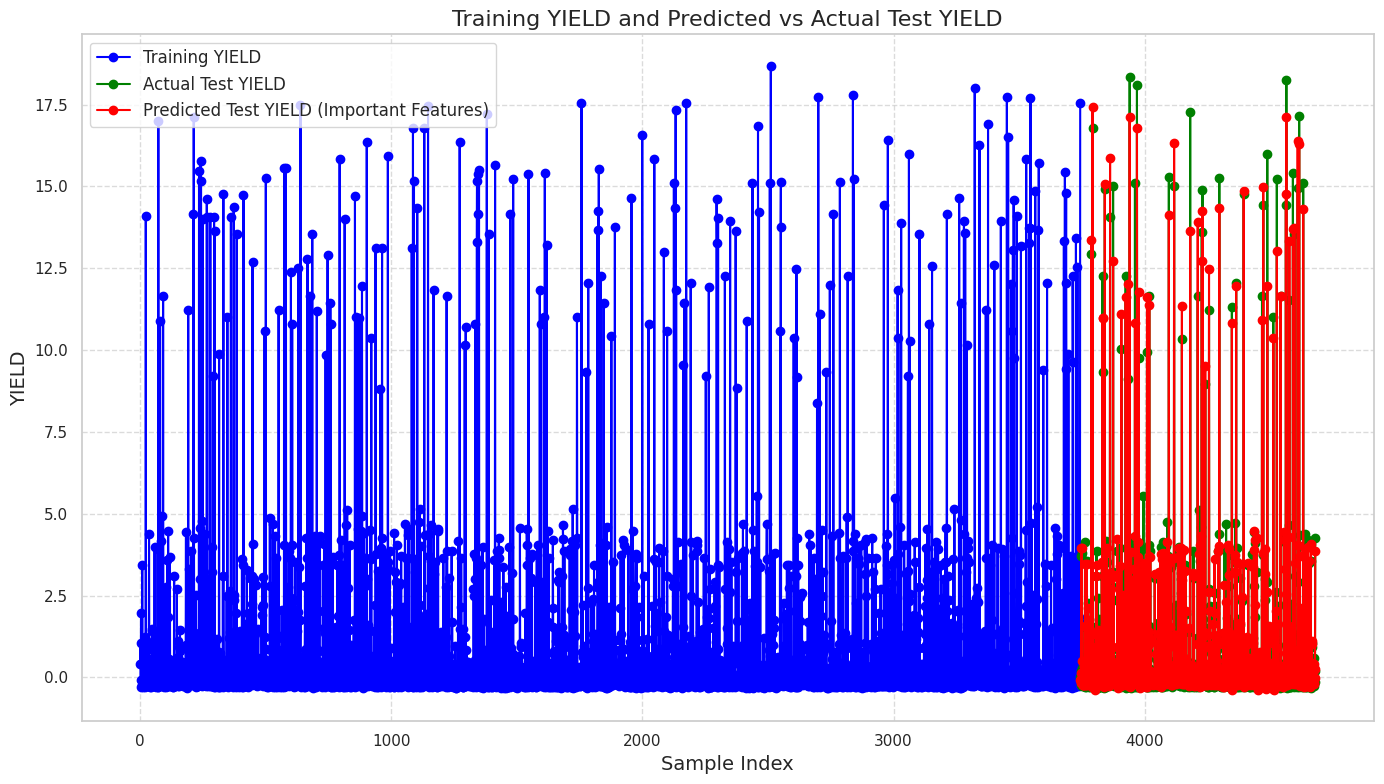

In [ ]:
def xgboost_feature_importance_encoded(df, target_column, test_size=0.2, random_state=42, top_n_features=10):
    """
    Apply XGBoost Regression to predict the target variable and extract feature importances.
    Use XGBoost to evaluate feature importance and select the top features.

    Parameters:
    - df: DataFrame containing the data.
    - target_column: The name of the target variable column.
    - test_size: The proportion of the dataset to include in the test split.
    - random_state: Controls the randomness of the estimator.
    - top_n_features: Number of top features to retain based on feature importance.

    Returns:
    - xgb_model: The fitted XGBoost model.
    - X_test: The test predictors.
    - y_test: The actual test target values.
    - y_pred: The predicted test target values.
    - model_metrics: A dictionary containing MSE and R^2 score.
    - feature_importances: DataFrame containing the feature importances.
    - xgb_model_important: The fitted XGBoost model with important features.
    - y_pred_important_test: Predictions for the test set using important features.
    - model_metrics_important: Model metrics for the important features.
    """

    # Define X and y
    X = df[climate_columns_with_commodity]  # Use climate_columns_with_commodity for encoded data
    y = df[target_column]

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Initialize and train XGBoost Regressor
    xgb_model = xgb.XGBRegressor(random_state=random_state)
    xgb_model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = xgb_model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    model_metrics = {'MSE': mse, 'R^2': r2}

    # Extract feature importances and sort by importance
    feature_importances = pd.DataFrame(xgb_model.feature_importances_, index=X.columns, columns=['Importance'])
    feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

    print(f'\nFeature Importances:\n{feature_importances}')

    # Print model metrics
    print(f'\nModel Metrics: {model_metrics}')

    # Extract the top N important features
    top_features = feature_importances.head(top_n_features).index
    print(f"\nTop {top_n_features} features: {top_features.tolist()}")

    # Create a new DataFrame with only the top features
    X_important_train = X_train[top_features]
    X_important_test = X_test[top_features]

    # Train a new XGBoost model with the important features
    xgb_model_important = xgb.XGBRegressor(random_state=random_state)
    xgb_model_important.fit(X_important_train, y_train)

    # Predict with the important features
    y_pred_important_test = xgb_model_important.predict(X_important_test)

    # Evaluate the new model
    mse_important = mean_squared_error(y_test, y_pred_important_test)
    r2_important = r2_score(y_test, y_pred_important_test)
    model_metrics_important = {'MSE': mse_important, 'R^2': r2_important}

    print(f'\nModel Metrics with Important Features: {model_metrics_important}')

    # Plot the training set yield and the prediction vs actual for the test set
    plt.figure(figsize=(14, 8))
    sns.set_style("whitegrid")

    # Plot training set yield
    plt.plot(range(len(y_train)), y_train, 'o-', label='Training YIELD', color='blue')

    # Plot the actual and predicted values for the test set
    plt.plot(range(len(y_train), len(y_train) + len(y_test)), y_test, 'o-', label='Actual Test YIELD', color='green')
    plt.plot(range(len(y_train), len(y_train) + len(y_test)), y_pred_important_test, 'o-', label='Predicted Test YIELD (Important Features)', color='red')

    plt.xlabel("Sample Index", fontsize=14)
    plt.ylabel("YIELD", fontsize=14)
    plt.title(f"Training YIELD and Predicted vs Actual Test YIELD", fontsize=16)
    plt.legend(fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

    return (xgb_model, X_test, y_test, y_pred, model_metrics, feature_importances,
            xgb_model_important, y_pred_important_test, model_metrics_important)

# Example usage
xgb_model, X_test, y_test, y_pred, model_metrics, feature_importances, xgb_model_important, y_pred_important_test, model_metrics_important = xgboost_feature_importance_encoded(
    agri_climate_df_encode,
    target_column='YIELD',
    test_size=0.2,
    top_n_features=10
)
